# **1. Library**

In [ ]:
# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
from scipy import stats
import missingno

# # Utilities
from viz_utils import *

# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

# **2. Reading the data**

In [ ]:
orders = pd.read_csv('olist_orders_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customer = pd.read_csv('olist_customers_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
products_english = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')

In [ ]:
# BD
orders = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/olist_orders_dataset.csv')
order_reviews = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/olist_order_reviews_dataset.csv')
customer = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/olist_customers_dataset.csv')
order_payments = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/olist_order_payments_dataset.csv')
order_items = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/olist_order_items_dataset.csv')
products = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/olist_products_dataset.csv')
products_english = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/product_category_name_translation.csv')
sellers = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/olist_sellers_dataset.csv')
geo = pd.read_csv('/content/gdrive/MyDrive/DATASET R PYTHON/olist_geolocation_dataset.csv')


## **Data Sets Scheme and Table Joining**

### **Orders and Order Reviews Table Joining**

In [ ]:
#Hiển thị DataFrame "orders" và "order_reviews" cùng với tổng số bản ghi trùng lặp của khóa chính
for i in zip([orders,order_reviews],['Orders','Order Reviews']):
    print('\n'+(' '+i[1]+' DataFrame ').center(151,'-'))
    display(i[0].head())
    duplicates = i[0]['order_id'].duplicated().sum()
    print('Total duplicates of primary key from',i[1],f'DataFrame is {duplicates}.')


------------------------------------------------------------------- Orders DataFrame ------------------------------------------------------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Total duplicates of primary key from Orders DataFrame is 0.

--------------------------------------------------------------- Order Reviews DataFrame ---------------------------------------------------------------


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Total duplicates of primary key from Order Reviews DataFrame is 551.


In [ ]:
#Merging Orders & Order_reviews Dataframe dựa vào order_id
merged_1 = orders.merge(
    order_reviews[order_reviews['order_id'].duplicated()==False][['order_id','review_score']],
    how='left',
    on='order_id'
)
display(merged_1.head())
merged_1.info(verbose=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Columns: 9 entries, order_id to review_score
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


### **Merged 1 and Customer Table Joining**

In [ ]:
#Hiển thị DataFrame "merged_1" và "customer" cùng với tổng số bản ghi trùng lặp của khóa chính
for i in zip([merged_1,customer],['Merged 1','Customers']):
    print('\n'+(' '+i[1]+' DataFrame ').center(151,'-'))
    display(i[0].head())
    duplicates = i[0]['customer_id'].duplicated().sum()
    print('Total duplicates of primary key from',i[1],f'DataFrame is {duplicates}.')


------------------------------------------------------------------ Merged 1 DataFrame -----------------------------------------------------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0


Total duplicates of primary key from Merged 1 DataFrame is 0.

----------------------------------------------------------------- Customers DataFrame -----------------------------------------------------------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Total duplicates of primary key from Customers DataFrame is 0.


In [ ]:
#Merging Merged 1 & Customer Dataframe dựa vào customer_id
stored_temporary = merged_1['customer_id']
merged_1.drop('customer_id',axis=1,inplace=True)
merged_1['customer_id'] = stored_temporary

customer_orders = merged_1.merge(
    customer,
    how='left',
    on='customer_id'
)
display(customer_orders.head())
customer_orders.info(verbose=False)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Columns: 13 entries, order_id to customer_state
dtypes: float64(1), int64(1), object(11)
memory usage: 9.9+ MB


### **Customer Orders and Order Payments Table Joining**

In [ ]:
#Display Customer Orders & Order Payments Dataframe Along With Total Duplicates of Primary Key
for i in zip([customer_orders,order_payments],['Customer Orders','Order Payments']):
    print('\n'+(' '+i[1]+' DataFrame ').center(151,'-'))
    display(i[0].head())
    duplicates = i[0]['order_id'].duplicated().sum()
    print('Total duplicates of primary key from',i[1],f'DataFrame is {duplicates}.')


-------------------------------------------------------------- Customer Orders DataFrame --------------------------------------------------------------


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Total duplicates of primary key from Customer Orders DataFrame is 0.

--------------------------------------------------------------- Order Payments DataFrame --------------------------------------------------------------


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Total duplicates of primary key from Order Payments DataFrame is 4446.


In [ ]:
#Merging Customer Orders & Order Payments Dataframe dựa vào order_id
customer_payments = customer_orders[[
    'order_id','customer_unique_id','order_purchase_timestamp'
]].merge(
    order_payments,
    how='left',
    on='order_id'
)
display(customer_payments.head())
customer_payments.info(verbose=False)

,order_id,customer_unique_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,1.0,credit_card,3.0,179.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Columns: 7 entries, order_id to payment_value
dtypes: float64(3), object(4)
memory usage: 5.5+ MB


###**Order Items and Products Table Joining**

In [ ]:
# Tạo DataFrame mới
new_rows = [
    {
        'product_category_name': 'portateis_cozinha_e_preparadores_de_alimentos',
        'product_category_name_english': 'mobile cooker'
    },
    {
        'product_category_name': 'pc_gamer',
        'product_category_name_english': 'pc games'
    }
]
new_data = pd.DataFrame(new_rows)

# Ghép DataFrame mới vào DataFrame gốc
products_english = pd.concat([products_english, new_data], ignore_index=True)

In [ ]:

def splitter(cols):
    return ' '.join(cols[0].split('_'))

products_english['product_category_name_english'] = products_english[['product_category_name_english']].apply(splitter,axis=1)

def category_mapping(cols):
    try:
        translate =  products_english.loc[products_english['product_category_name']==cols,'product_category_name_english'].values[0]
    except:
        translate = cols
    return translate

products['product_category_name'] = products['product_category_name'].apply(category_mapping)

In [ ]:
#Display Order Items & Products Dataframe Along With Total Duplicates of Primary Key
for i in zip([order_items,products],['Order Items','Products']):
    print('\n'+(' '+i[1]+' DataFrame ').center(151,'-'))
    display(i[0].head())
    duplicates = i[0]['product_id'].duplicated().sum()
    print('Total duplicates of primary key from',i[1],f'DataFrame is {duplicates}.')


---------------------------------------------------------------- Order Items DataFrame ----------------------------------------------------------------


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Total duplicates of primary key from Order Items DataFrame is 79699.

------------------------------------------------------------------ Products DataFrame -----------------------------------------------------------------


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Total duplicates of primary key from Products DataFrame is 0.


In [ ]:
#Merging Order Items & Products Dataframe Based on product_id
merged_2 = order_items.drop(
    'shipping_limit_date',
    axis=1
).merge(
    products.drop(['product_name_lenght','product_description_lenght','product_photos_qty'],axis=1),
    how='left',
    on='product_id'
)
display(merged_2.head())
merged_2.info(verbose=False)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,furniture decor,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden tools,3750.0,35.0,40.0,30.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Columns: 11 entries, order_id to product_width_cm
dtypes: float64(6), int64(1), object(4)
memory usage: 9.5+ MB


### **Merged 2 and Sellers Table Joining**

In [ ]:
#Display Merged 2 & Sellers Dataframe Along With Total Duplicates of Primary Key
for i in zip([merged_2,sellers],['Merged 2','Sellers']):
    print('\n'+(' '+i[1]+' DataFrame ').center(151,'-'))
    display(i[0].head())
    duplicates = i[0]['seller_id'].duplicated().sum()
    print('Total duplicates of primary key from',i[1],f'DataFrame is {duplicates}.')


------------------------------------------------------------------ Merged 2 DataFrame -----------------------------------------------------------------


,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,furniture decor,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden tools,3750.0,35.0,40.0,30.0


Total duplicates of primary key from Merged 2 DataFrame is 109555.

------------------------------------------------------------------ Sellers DataFrame ------------------------------------------------------------------


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Total duplicates of primary key from Sellers DataFrame is 0.


In [ ]:
#Merging Merged 2 & Sellers Dataframe Based on seller_id
stored_temporary = merged_2['seller_id']
merged_2.drop('seller_id',axis=1,inplace=True)
merged_2['seller_id'] = stored_temporary

sales_history = merged_2.merge(
    sellers,
    how='left',
    on='seller_id'
)
display(sales_history.head())
sales_history.info(verbose=False)

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,furniture decor,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumery,200.0,16.0,10.0,15.0,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,garden tools,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Columns: 14 entries, order_id to seller_state
dtypes: float64(6), int64(2), object(6)
memory usage: 12.0+ MB


### **Customer Orders and Sales History Table Joining**

In [ ]:
#Display Customer Orders & Sales History Dataframe Along With Total Duplicates of Primary Key
for i in zip([customer_orders,sales_history],['Customer Orders','Sales History']):
    print('\n'+(' '+i[1]+' DataFrame ').center(151,'-'))
    display(i[0].head())
    duplicates = i[0]['order_id'].duplicated().sum()
    print('Total duplicates of primary key from',i[1],f'DataFrame is {duplicates}.')


-------------------------------------------------------------- Customer Orders DataFrame --------------------------------------------------------------


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Total duplicates of primary key from Customer Orders DataFrame is 0.

--------------------------------------------------------------- Sales History DataFrame ---------------------------------------------------------------


,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,furniture decor,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumery,200.0,16.0,10.0,15.0,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,garden tools,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR


Total duplicates of primary key from Sales History DataFrame is 13984.


In [ ]:
#Merging Customer Orders & Sales History Dataframe Based on order_id
order_history = sales_history.merge(
    customer_orders,
    how='left',
    on='order_id'
)
display(order_history.head())
order_history.info(verbose=False)

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,furniture decor,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumery,200.0,16.0,10.0,15.0,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,garden tools,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Columns: 26 entries, order_id to customer_state
dtypes: float64(7), int64(3), object(16)
memory usage: 22.3+ MB


### **Joining Result**

In [ ]:
#Display Order History & Customer Payments Dataframe Along With Total Duplicates of Primary Key
for i in zip([order_history,customer_payments],['Order History','Customer Payments']):
    print('\n'+(' '+i[1]+' DataFrame ').center(151,'-'))
    display(i[0].head())
    print('Data Size:',i[0].shape,'(Baris & Kolom)')


--------------------------------------------------------------- Order History DataFrame ---------------------------------------------------------------


,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,furniture decor,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumery,200.0,16.0,10.0,15.0,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,garden tools,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


Data Size: (112650, 26) (Baris & Kolom)

------------------------------------------------------------- Customer Payments DataFrame -------------------------------------------------------------


,order_id,customer_unique_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,1.0,credit_card,3.0,179.12


Data Size: (103887, 7) (Baris & Kolom)


### **State Code Mapping**

In [ ]:
#Mapping States Code with States Name
state_disctionary = {
    'AC':'Acre','AL':'Alagoas','AM':'Amazonas','AP':'Amapá',
    'BA':'Bahia',
    'CE':'Ceará',
    'DF':'Distrito Federal',
    'ES':'Espírito Santo',
    'GO':'Goiás',
    'MA':'Maranhão','MG':'Minas Gerais','MS':'Mato Grosso do Sul','MT':'Mato Grosso',
    'PA':'Pará','PB':'Paraíba','PE':'Pernambuco','PI':'Piauí','PR':'Paraná',
    'RJ':'Rio de Janeiro','RN':'Rio Grande do Norte','RO':'Rondônia','RR':'Roraima','RS':'Rio Grande do Sul',
    'SC':'Santa Catarina','SE':'Sergipe','SP':'São Paulo',
    'TO':'Tocantins'
}

def states_name(cols):
    return state_disctionary[cols]

for i in ['customer_state','seller_state']:
    order_history[i] = order_history[i].apply(states_name)

# **3. Exploratory Data Analysis**


## **EDA PART 1**

### **Attribute Information**

In [ ]:
#Display The Attribute Information of Order History and Customer Payments Dataframe
for n, dataset in enumerate([order_history,customer_payments]):
    prompt = 'Order History' if n == 0 else 'Customer Payments'
    print('\n'+(f' Information Attribute of {prompt} DataSet ').center(151,'='))
    items = [[
        col,
        dataset[col].dtype,
        dataset[col].nunique(),
        list(dataset[col].unique()),
        dataset[col].isnull().sum()
    ] for col in dataset]

    pd.set_option('display.max_colwidth',100)
    display(pd.DataFrame(
        data=items,
        columns=[
            'Attributes',
            'Data Type',
            'Total Unique',
            'Unique Sample',
            'Total Missing'
        ]))


==================================================== Information Attribute of Order History DataSet ===================================================


,Attributes,Data Type,Total Unique,Unique Sample,Total Missing
0,order_id,object,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f0320c557190d7a144bdd3, 000229ec398224ef6ca0657da4f...",0
1,order_item_id,int64,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]",0
2,product_id,object,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802189ee658865ca93d83a8f, c777355d18b72b67abbeef9df44...",0
3,price,float64,5968,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9, 810.0, 145.95, 53.99, 59.99, 45.0, 74.0, 49.9, 99...",0
4,freight_value,float64,6999,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11.85, 70.75, 11.65, 11.4, 8.88, 12.98, 23.32, 13.37,...",0
5,product_category_name,object,73,"[cool stuff, pet shop, furniture decor, perfumery, garden tools, housewares, telephony, health b...",1603
6,product_weight_g,float64,2204,"[650.0, 30000.0, 3050.0, 200.0, 3750.0, 450.0, 13805.0, 2000.0, 850.0, 950.0, 1383.0, 1650.0, 10...",18
7,product_length_cm,float64,99,"[28.0, 50.0, 33.0, 16.0, 35.0, 24.0, 27.0, 30.0, 29.0, 40.0, 23.0, 20.0, 17.0, 55.0, 34.0, 105.0...",18
8,product_height_cm,float64,102,"[9.0, 30.0, 13.0, 10.0, 40.0, 8.0, 5.0, 75.0, 12.0, 3.0, 25.0, 16.0, 22.0, 20.0, 18.0, 4.0, 54.0...",18
9,product_width_cm,float64,95,"[14.0, 40.0, 33.0, 15.0, 30.0, 20.0, 45.0, 16.0, 21.0, 11.0, 12.0, 19.0, 34.0, 28.0, 41.0, 13.0,...",18



================================================== Information Attribute of Customer Payments DataSet =================================================


,Attributes,Data Type,Total Unique,Unique Sample,Total Missing
0,order_id,object,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc7dce0b6741e2150273451, 47770eb9100c2d0c44946d9cf07...",0
1,customer_unique_id,object,96096,"[7c396fd4830fd04220f754e42b4e5bff, af07308b275d755c9edb36a90c618231, 3a653a41f6f9fc3d2a113cf8398...",0
2,order_purchase_timestamp,object,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 2018-08-08 08:38:49, 2017-11-18 19:28:06, 2018-02-13 ...",0
3,payment_sequential,float64,29,"[1.0, 3.0, 2.0, 4.0, 8.0, 5.0, 7.0, 9.0, 6.0, 14.0, 17.0, 22.0, 11.0, 16.0, 13.0, 18.0, 12.0, 19...",1
4,payment_type,object,5,"[credit_card, voucher, boleto, debit_card, not_defined, nan]",1
5,payment_installments,float64,24,"[1.0, 3.0, 6.0, 10.0, 4.0, 2.0, 8.0, 9.0, 7.0, 5.0, 13.0, 12.0, 15.0, 14.0, 21.0, 18.0, 24.0, 17...",1
6,payment_value,float64,29077,"[18.12, 2.0, 18.59, 141.46, 179.12, 72.2, 28.62, 175.26, 65.95, 75.16, 35.95, 161.42, 8.34, 259....",1


### **Descriptive Statistics**

In [ ]:
#Display The Descriptive Statistics of Order History and Customer Payments Dataframe
for k, dataset in enumerate([order_history,customer_payments]):
    prompt1 = ' {} DataSet '.format('Order History' if k == 0 else 'Customer Payments')
    print('\n'+prompt1.center(151,'='))
    for i, type in enumerate([['int','float'],['object']]):
        prompt2 = ' Descriptive Statistics on {} Features '.format('Numerical' if i == 0 else 'Non-Numerical')
        print('\n'+prompt2.center(151,'-'))
        display(dataset.describe(include=type))


================================================================ Order History DataSet ================================================================

----------------------------------------------------- Descriptive Statistics on Numerical Features ----------------------------------------------------


,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,customer_zip_code_prefix
count,112650.000000,112650.000000,112650.000000,112632.000000,112632.000000,112632.000000,112632.000000,112650.000000,111708.000000,112650.000000
mean,1.197834,120.653739,19.990320,2093.672047,30.153669,16.593766,22.996546,24439.170431,4.033516,35119.309090
std,0.705124,183.633928,15.806405,3751.596884,16.153449,13.443483,11.707268,27596.030909,1.387084,29866.120801
min,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,1003.000000
25%,1.000000,39.900000,13.080000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,11310.000000
50%,1.000000,74.990000,16.260000,700.000000,25.000000,13.000000,20.000000,13568.000000,5.000000,24340.000000
75%,1.000000,134.900000,21.150000,1800.000000,38.000000,20.000000,30.000000,27930.000000,5.000000,59028.750000
max,21.000000,6735.000000,409.680000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,99990.000000



--------------------------------------------------- Descriptive Statistics on Non-Numerical Features --------------------------------------------------


,order_id,product_id,product_category_name,seller_id,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_id,customer_unique_id,customer_city,customer_state
count,112650,112650,111047,112650,112650,112650,112650,112650,112635,111456,110196,112650,112650,112650,112650,112650
unique,98666,32951,73,3095,611,23,7,98112,90174,81017,95664,450,98666,95420,4110,27
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,bed bath table,6560211a19b47992c3666cc44a7e94c0,sao paulo,São Paulo,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-07-31 18:03:02,2017-12-20 00:00:00,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,sao paulo,São Paulo
freq,21,527,11115,2033,27983,80342,110197,21,23,48,21,604,21,24,17808,47449



============================================================== Customer Payments DataSet ==============================================================

----------------------------------------------------- Descriptive Statistics on Numerical Features ----------------------------------------------------


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000



--------------------------------------------------- Descriptive Statistics on Non-Numerical Features --------------------------------------------------


,order_id,customer_unique_id,order_purchase_timestamp,payment_type
count,103887,103887,103887,103886
unique,99441,96096,98875,5
top,fa65dad1b0e818e3ccc5cb0e39231352,9a736b248f67d166d2fbb006bcb877c3,2017-04-20 12:45:34,credit_card
freq,29,33,29,76795


### **Normality Test**

In [ ]:

#Perform Normality Test on Each Features from Order History and Customer Payment Dataframe
for k, dataset in enumerate([order_history.drop('review_score',axis=1),customer_payments]):
    prompt = ' Normality Test of {} DataSet '.format('Order History' if k == 0 else 'Customer Payments')
    print('\n'+prompt.center(61,'='))
    cols, stats_val, p_val, result = [], [], [], []

    for i in dataset.describe().columns:
        stat, pvalue = stats.kstest(
            dataset[i],
            np.random.normal(
                dataset[i].mean(),
                dataset[i].std(),
                size=len(dataset[i])
            )
        )

        cols.append(i)
        stats_val.append(stat)
        p_val.append('> 0.05' if pvalue > 0.05 else '< 0.05')
        result.append(True if pvalue > 0.05 else False)

    display(pd.DataFrame(
        data={
            'Statistic':stats_val,
            'P-Value':p_val,
            'Normally Distributed':result
        },
        index=cols
    ))


========== Normality Test of Order History DataSet ==========


,Statistic,P-Value,Normally Distributed
order_item_id,0.485042,< 0.05,False
price,0.265601,< 0.05,False
freight_value,0.223471,< 0.05,False
product_weight_g,0.292996,< 0.05,False
product_length_cm,0.183941,< 0.05,False
product_height_cm,0.171372,< 0.05,False
product_width_cm,0.184314,< 0.05,False
seller_zip_code_prefix,0.293671,< 0.05,False
customer_zip_code_prefix,0.144714,< 0.05,False



======== Normality Test of Customer Payments DataSet ========


,Statistic,P-Value,Normally Distributed
payment_sequential,0.508370,< 0.05,False
payment_installments,0.259705,< 0.05,False
payment_value,0.244573,< 0.05,False


In [ ]:
#Display The Attribute Information of Order History and Customer Payments Dataframe
for n, dataset in enumerate([order_history,customer_payments]):
    prompt = 'Order History' if n == 0 else 'Customer Payments'
    print('\n'+(f' Information Attribute of {prompt} DataSet ').center(151,'='))
    items = [[
        col,
        dataset[col].dtype,
        dataset[col].nunique(),
        list(dataset[col].unique()),
        dataset[col].isnull().sum()
    ] for col in dataset]

    pd.set_option('display.max_colwidth',100)
    display(pd.DataFrame(
        data=items,
        columns=[
            'Attributes',
            'Data Type',
            'Total Unique',
            'Unique Sample',
            'Total Missing'
        ]))


==================================================== Information Attribute of Order History DataSet ===================================================


,Attributes,Data Type,Total Unique,Unique Sample,Total Missing
0,order_id,object,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f0320c557190d7a144bdd3, 000229ec398224ef6ca0657da4f...",0
1,order_item_id,int64,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]",0
2,product_id,object,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802189ee658865ca93d83a8f, c777355d18b72b67abbeef9df44...",0
3,price,float64,5968,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9, 810.0, 145.95, 53.99, 59.99, 45.0, 74.0, 49.9, 99...",0
4,freight_value,float64,6999,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11.85, 70.75, 11.65, 11.4, 8.88, 12.98, 23.32, 13.37,...",0
5,product_category_name,object,73,"[cool stuff, pet shop, furniture decor, perfumery, garden tools, housewares, telephony, health b...",1603
6,product_weight_g,float64,2204,"[650.0, 30000.0, 3050.0, 200.0, 3750.0, 450.0, 13805.0, 2000.0, 850.0, 950.0, 1383.0, 1650.0, 10...",18
7,product_length_cm,float64,99,"[28.0, 50.0, 33.0, 16.0, 35.0, 24.0, 27.0, 30.0, 29.0, 40.0, 23.0, 20.0, 17.0, 55.0, 34.0, 105.0...",18
8,product_height_cm,float64,102,"[9.0, 30.0, 13.0, 10.0, 40.0, 8.0, 5.0, 75.0, 12.0, 3.0, 25.0, 16.0, 22.0, 20.0, 18.0, 4.0, 54.0...",18
9,product_width_cm,float64,95,"[14.0, 40.0, 33.0, 15.0, 30.0, 20.0, 45.0, 16.0, 21.0, 11.0, 12.0, 19.0, 34.0, 28.0, 41.0, 13.0,...",18



================================================== Information Attribute of Customer Payments DataSet =================================================


,Attributes,Data Type,Total Unique,Unique Sample,Total Missing
0,order_id,object,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc7dce0b6741e2150273451, 47770eb9100c2d0c44946d9cf07...",0
1,customer_unique_id,object,96096,"[7c396fd4830fd04220f754e42b4e5bff, af07308b275d755c9edb36a90c618231, 3a653a41f6f9fc3d2a113cf8398...",0
2,order_purchase_timestamp,object,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 2018-08-08 08:38:49, 2017-11-18 19:28:06, 2018-02-13 ...",0
3,payment_sequential,float64,29,"[1.0, 3.0, 2.0, 4.0, 8.0, 5.0, 7.0, 9.0, 6.0, 14.0, 17.0, 22.0, 11.0, 16.0, 13.0, 18.0, 12.0, 19...",1
4,payment_type,object,5,"[credit_card, voucher, boleto, debit_card, not_defined, nan]",1
5,payment_installments,float64,24,"[1.0, 3.0, 6.0, 10.0, 4.0, 2.0, 8.0, 9.0, 7.0, 5.0, 13.0, 12.0, 15.0, 14.0, 21.0, 18.0, 24.0, 17...",1
6,payment_value,float64,29077,"[18.12, 2.0, 18.59, 141.46, 179.12, 72.2, 28.62, 175.26, 65.95, 75.16, 35.95, 161.42, 8.34, 259....",1


### **Multicollinearity Test**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:

#Perform Multicollinearity Test on Each Features from Order History and Customer Payments Dataframe
for k, dataset in enumerate([order_history,customer_payments]):
    x = dataset.select_dtypes(include=[np.number]).dropna(axis=0)
    prompt = ' VIF of {} DataSet '.format('Order History' if k == 0 else 'Customer Payments')
    print('\n'+prompt.center(54,'='))
    vif = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    display(pd.DataFrame(
        data={
            'Columns':x.columns,
            'VIF':vif,
            'Multicollinearity':['Not Correlated' if val < 5 else 'Relatively Correlated' if val < 10 else\
                                 'Highly Correlated' for val in vif]
        }
    ))


============ VIF of Order History DataSet ============


,Columns,VIF,Multicollinearity
0,order_item_id,3.305502,Not Correlated
1,price,1.764258,Not Correlated
2,freight_value,4.924280,Not Correlated
3,product_weight_g,3.106695,Not Correlated
4,product_length_cm,6.421888,Relatively Correlated
5,product_height_cm,3.667540,Not Correlated
6,product_width_cm,7.132634,Relatively Correlated
7,seller_zip_code_prefix,1.830853,Not Correlated
8,review_score,5.460839,Relatively Correlated
9,customer_zip_code_prefix,2.496509,Not Correlated



========== VIF of Customer Payments DataSet ==========


,Columns,VIF,Multicollinearity
0,payment_sequential,1.544243,Not Correlated
1,payment_installments,1.935791,Not Correlated
2,payment_value,1.621615,Not Correlated


### **Visual Inspection of Numerical Columns**

In [ ]:
from math import floor

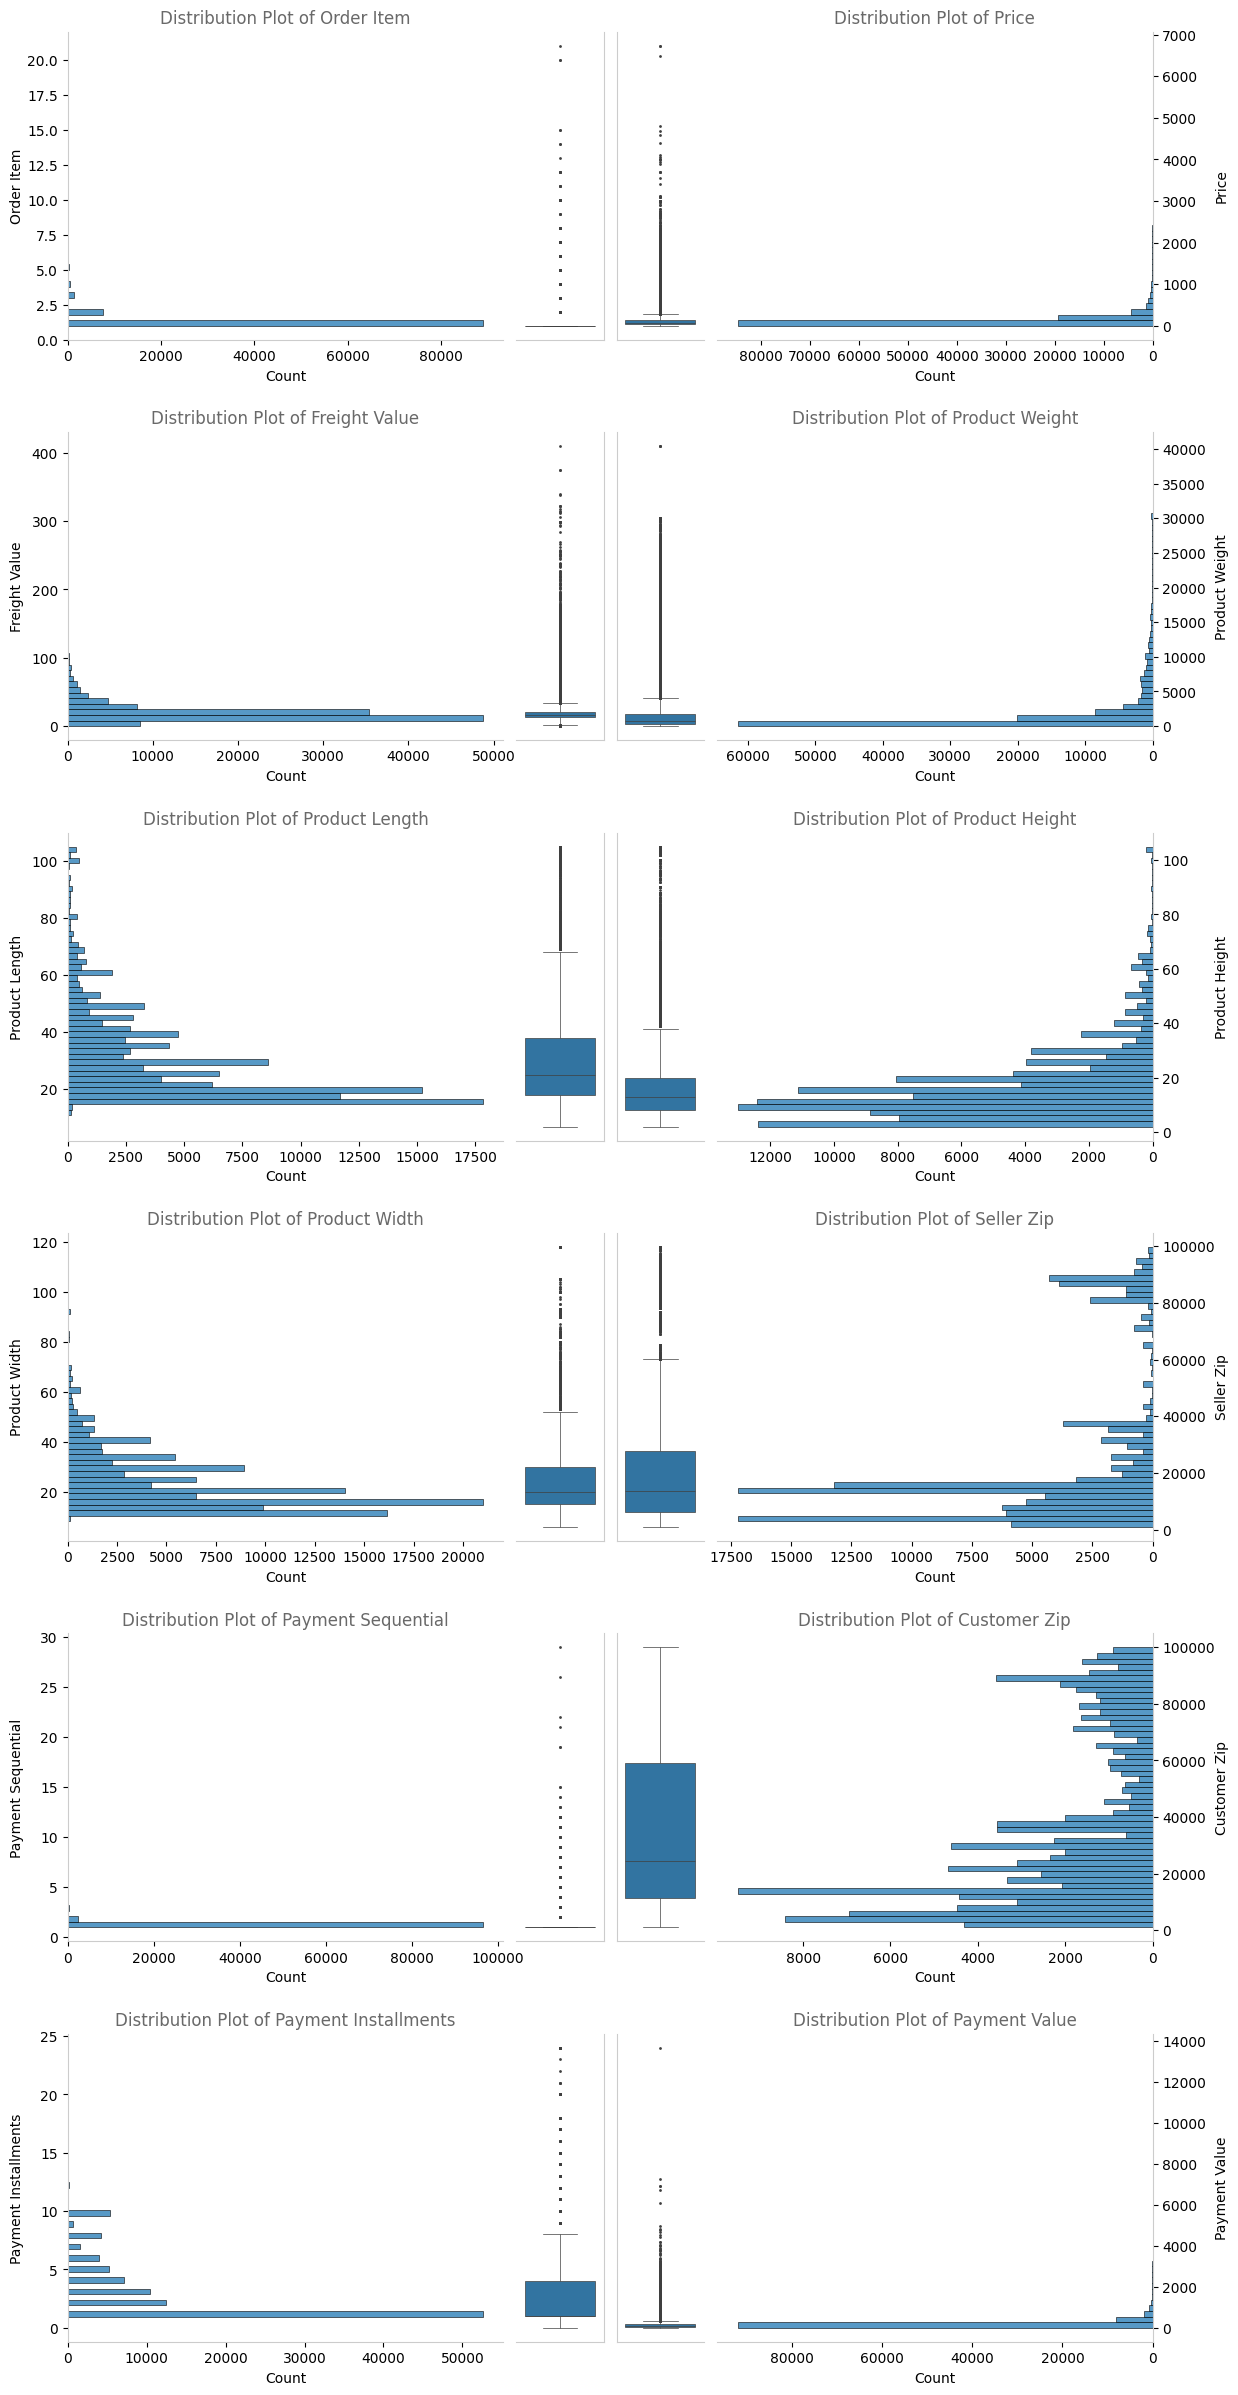

In [ ]:
#Display Distribution Plot for Numerical Features in Order History and Customer Payments Dataframe
selection = np.array(list(order_history.drop('review_score',axis=1).describe().columns) +
                     list(customer_payments.describe().columns))
on_left, on_right = selection[np.r_[0,2,4,6,9,10]], selection[np.r_[1,3,5,7,8,11]]

fig, axes = plt.subplots(
    nrows=int(len(selection)/2),
    ncols=4,
    figsize=(14,int(5*len(selection)/2)),
    gridspec_kw={
        'height_ratios':[1]*int(len(selection)/2),
        'width_ratios':[5,1,1,5],
        'wspace':.05,
        'hspace':.3
    }
)
for n, nums in enumerate(selection):
    y_axis = order_history.groupby('order_id')[nums].max() if nums == 'order_item_id' else\
        order_history[nums] if n < 9 else\
            customer_payments.groupby('order_id')[nums].max() if nums == 'payment_sequential' else\
                customer_payments[nums]

    def create_histplot(on):
        return sns.histplot(
            y=y_axis,
            ax=axes[floor(n/2),0 if on == 'left' else 3],
            bins=50
        )

    def create_boxplot(on):
        return sns.boxplot(
            y=y_axis,
            ax=axes[floor(n/2),1 if on == 'left' else 2],
            linewidth=0.5,
            fliersize=1
        )
    def control_histplot(plot,on):
        sequence = ['top','right','left','bottom'] if on == 'left' else\
            ['top','left','right','bottom']
        plot.set_ylabel(' '.join(nums.split('_')[:2]).title())
        plot.yaxis.set_label_coords(-.1 if on == 'left' else 1.175,.5)
        plot.set_title(
            'Distribution Plot of '+' '.join(nums.split('_')[:2]).title(),
            size=12,
            color='dimgrey'
        )

        if on == 'right':
            plot.yaxis.tick_right()
            x_limits = plot.get_xlim()
            plot.set_xlim((x_limits[1],x_limits[0]))

        for i, loc in enumerate(sequence):
            plot.spines[loc].set_visible(False if i < 2 else True)
            plot.spines[loc].set_color('#CCCCCC')

    def control_boxplot(plot,on):
        sequence = ['left','top','bottom','right'] if on == 'left' else\
            ['right','top','bottom','left']
        plot.set_xlabel('Boxplot')
        plot.xaxis.set_visible(False)
        plot.yaxis.set_visible(False)

        for i, loc in enumerate(sequence):
            plot.spines[loc].set_visible(False if i < 2 else True)
            plot.spines[loc].set_color('#CCCCCC')

    if nums in on_left:
        control_histplot(plot=create_histplot(on='left'),on='left')
        control_boxplot(plot=create_boxplot(on='left'),on='left')

    if nums in on_right:
        control_histplot(plot=create_histplot(on='right'),on='right')
        control_boxplot(plot=create_boxplot(on='right'),on='right')

**📌INSIGHT:** Dựa trên kiểm tra trực quan cho các cột, như chúng ta có thể thấy hầu hết các cột đều biểu thị với Phân phối lệch dương (Positive Skew
Distribution). Vì vậy, có thể kết luận rằng dữ liệu trong những cột này **không tuân theo phân phối chuẩn**.

### **Datetime Value Formatting**

In [ ]:
#Formatting Features with Datetime Value
date_columns = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                'order_delivered_customer_date','order_estimated_delivery_date']

for i in date_columns:
    order_history[i] = pd.to_datetime(order_history[i])

customer_payments['order_purchase_timestamp'] = pd.to_datetime(customer_payments['order_purchase_timestamp'])

order_history[date_columns].head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


### **Data cleaning**

**Missing Value of Order History**

Text(0.5, 1.0, 'Total Missing Value')

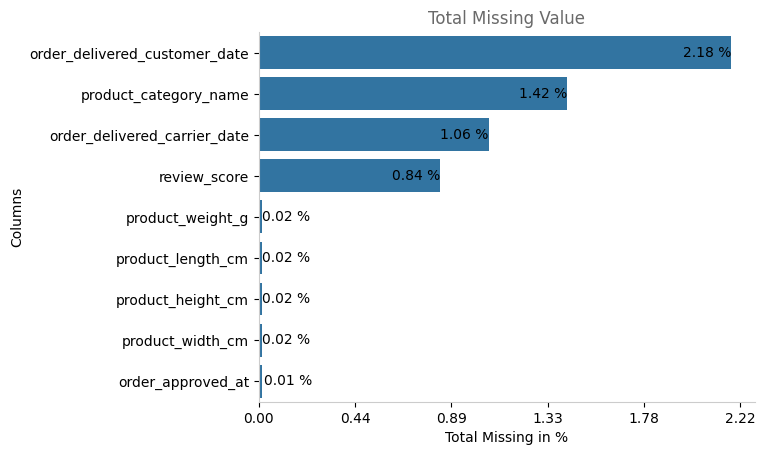

In [ ]:
#Display The Total Missing Value Plot from Order History Dataframe
missing_info = pd.DataFrame(order_history.isnull().sum())
missing_info = missing_info[missing_info[0]!=0].sort_values(0,ascending=False)

barplot = sns.barplot(
    missing_info,
    x=0,
    y=missing_info.index,
)

for i, val in enumerate(missing_info[0]):
    plt.annotate(
        f'{100*(val/order_history.shape[0]):,.2f} %',
        xy=(val if i < 8 else val+10,i),
        ha='right' if i < 4 else 'left',
        va='center'
    )

sns.despine()
barplot.spines['left'].set_color('#CCCCCC'), barplot.spines['bottom'].set_color('#CCCCCC')
barplot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/order_history.shape[0]*100:.2f}'))
plt.xlabel('Total Missing in %'), plt.ylabel('Columns')
plt.title(
    'Total Missing Value',
    size=12,
    color='dimgrey'
)

📌**Insight:**
Dựa trên biểu đồ tổng giá trị thiếu trên, có thể thấy rằng order_delivered_customer_date là dữ liệu thiếu nhiều nhất trong Order History Dataframe với tỷ lệ 2.18%, tiếp theo là product_category_name với 1.42%, order_delivered_carrier_date với 1.06% và review_score với 0.84%. Mỗi cột này cần được làm sạch để đảm bảo rằng mô hình được xây dựng không bị thiên lệch.

Text(0.5, 1.0, 'Missingness Correlation of Order History\n')

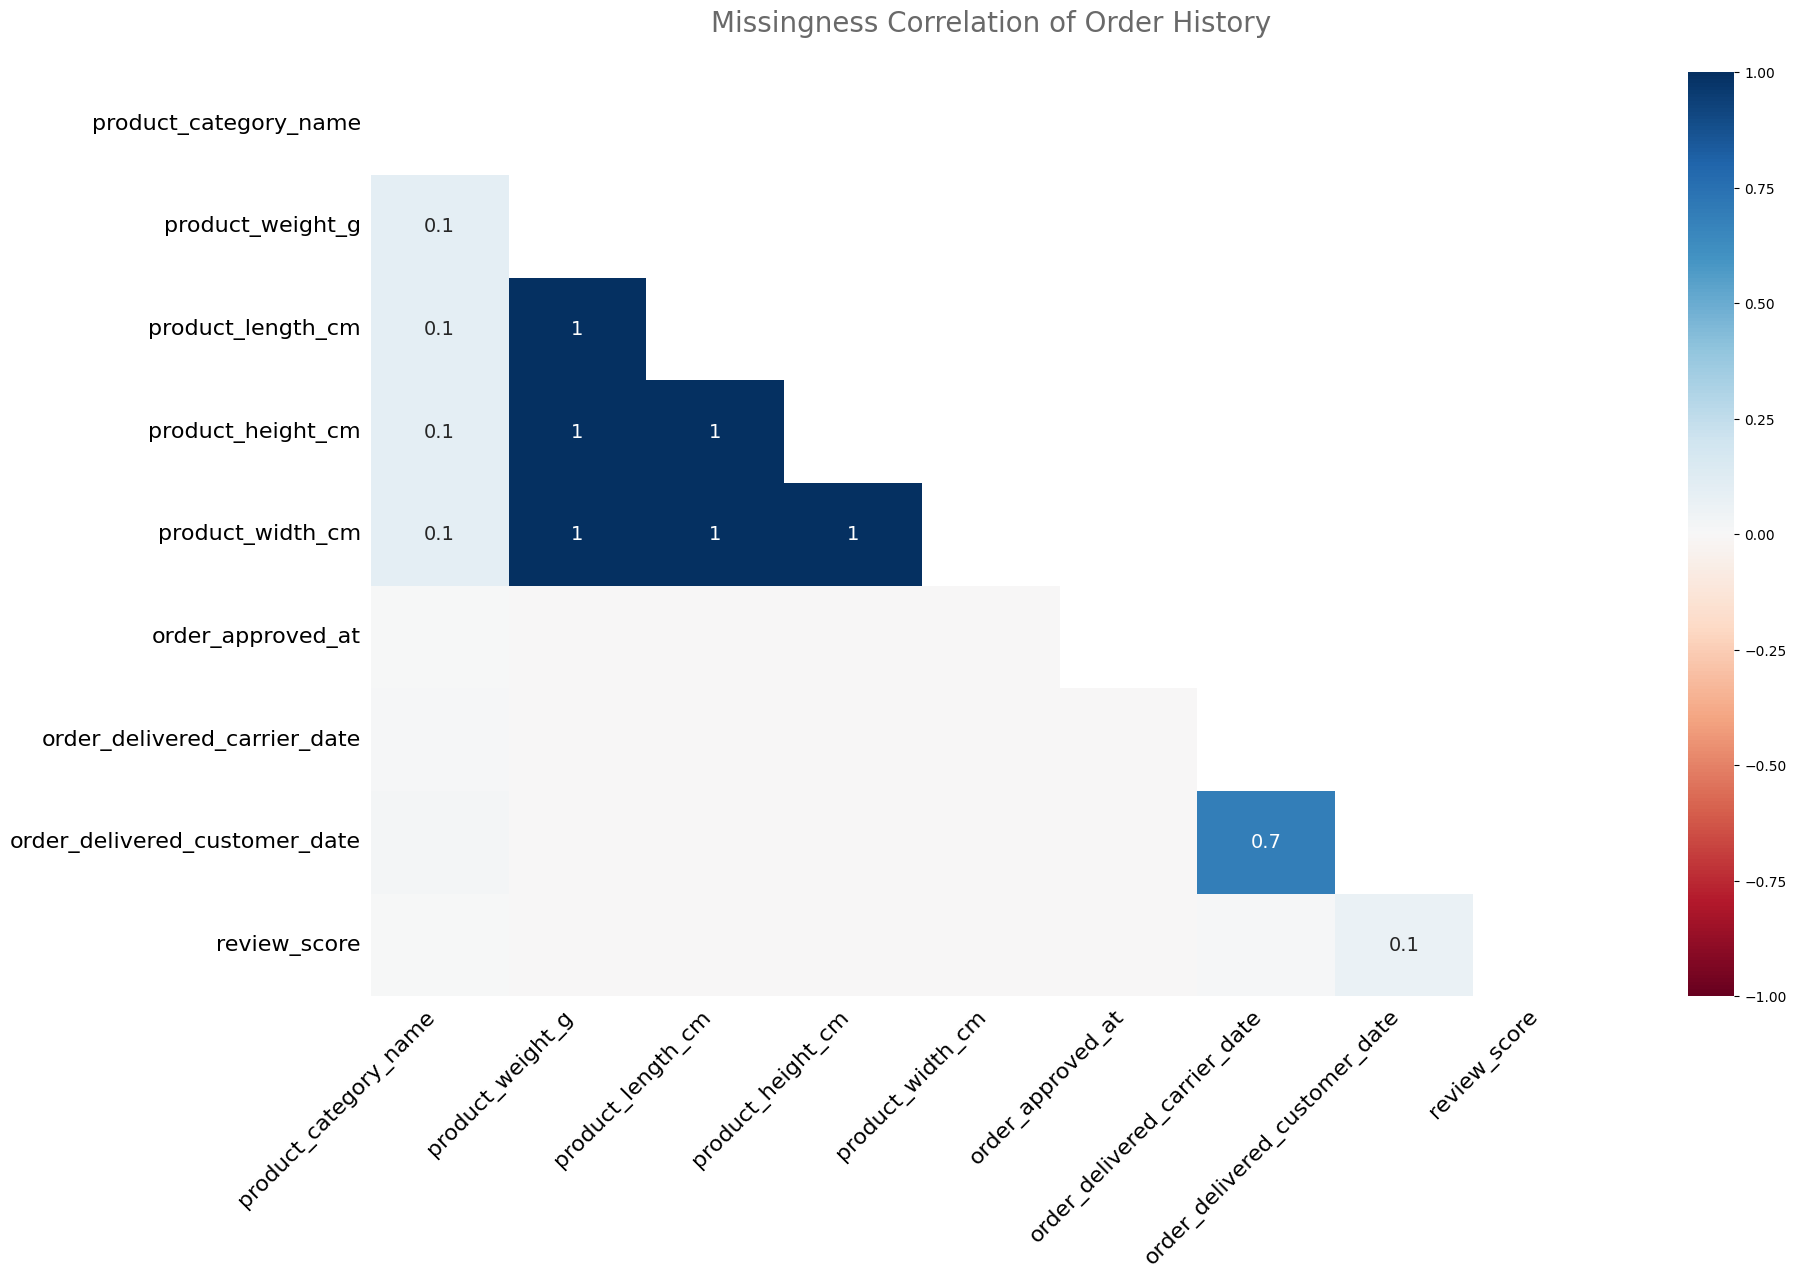

In [ ]:
#Display The Missing No Heatmap from Order History Dataframe
missingno.heatmap(order_history)
plt.title(
    'Missingness Correlation of Order History\n',
    size=20,
    color='dimgrey'
)

📌**Insight**

Dựa trên biểu đồ ở trên, có thể thấy rằng product_length_cm, product_heigth_cm, product_width_cm có mối tương quan mạnh nhất với nhau. Mối tương quan mạnh thứ hai là giữa các cột order_delivered_customer_date và order_delivered_carrier_date với giá trị là 0.7.

**Order Approval Date Missing Value Imputing**

In [ ]:
#Display order_approved_at missing value from Order History Dataframe
display(order_history[order_history['order_approved_at'].isnull()][[
    'order_id','product_id','seller_id','order_approved_at'
]].head())
order_history[order_history['order_approved_at'].isnull()].info(verbose=False)

,order_id,product_id,seller_id,order_approved_at
8204,12a95a3c06dbaec84bcfb0e2da5d228a,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,NaT
19005,2babbb4b15e6d2dfe95e2de765c97bce,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,NaT
20473,2eecb0d85f281280f79fa00f9cec1a95,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,NaT
26393,3c0b8706b065f9919d0505d3b3343881,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,NaT
36128,51eb2eebd5d76a24625b31c33dd41449,7868a64aa111bbb4f41f8e1146c0becb,cca3071e3e9bb7d12640c9fbe2301306,NaT


<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 8204 to 98863
Columns: 26 entries, order_id to customer_state
dtypes: datetime64[ns](5), float64(7), int64(3), object(11)
memory usage: 3.2+ KB


In [ ]:
#Dropping order_approved_at Features from Order History Dataframe
order_history.drop(
    index=order_history[order_history['order_approved_at'].isnull()].index,
    inplace=True
)

**Product Metrics Missing Value Imputing**

In [ ]:

#Display product_weight_g, product_length_cm, product_height_cm, and product_width_cm  missing value from Order History Dataframe
display(order_history[order_history['product_weight_g'].isnull()][[
    'product_weight_g','product_length_cm','product_height_cm','product_width_cm'
]].head())
order_history[order_history['product_weight_g'].isnull()].info(verbose=False)

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7098,NaN,NaN,NaN,NaN
9233,NaN,NaN,NaN,NaN
28715,NaN,NaN,NaN,NaN
28716,NaN,NaN,NaN,NaN
39299,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 7098 to 103715
Columns: 26 entries, order_id to customer_state
dtypes: datetime64[ns](5), float64(7), int64(3), object(11)
memory usage: 3.8+ KB


In [ ]:
#Display product_weight_g missing value with unique product_id
for i in order_history[order_history['product_weight_g'].isnull()]['product_id'].unique():
    display(products[products['product_id']==i][[
        'product_id','product_category_name','product_weight_g','product_length_cm','product_height_cm','product_width_cm'
    ]])

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,baby,NaN,NaN,NaN,NaN


In [ ]:
#Dropping product_weight_g Features from Order History Dataframe
order_history.drop(
    index=order_history[order_history['product_weight_g'].isnull()].index,
    inplace=True
)

**Product Category Name Missing Value Imputing**

In [ ]:
#Display product_category_name missing value with unique order_id and product_id
display(order_history[order_history['product_category_name'].isnull()][[
    'order_id','product_id','product_category_name'
]].head())
order_history[order_history['product_category_name'].isnull()].info(verbose=False)

,order_id,product_id,product_category_name
123,0046e1d57f4c07c8c92ab26be8c3dfc0,ff6caf9340512b8bf6d2a2a6df032cfa,NaN
125,00482f2670787292280e0a8153d82467,a9c404971d1a5b1cbc2e4070e02731fd,NaN
132,004f5d8f238e8908e6864b874eda3391,5a848e4ab52fd5445cdc07aab1c40e48,NaN
142,0057199db02d1a5ef41bacbf41f8f63b,41eee23c25f7a574dfaf8d5c151dbb12,NaN
171,006cb7cafc99b29548d4f412c7f9f493,e10758160da97891c2fdcbc35f0f031d,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 1585 entries, 123 to 112501
Columns: 26 entries, order_id to customer_state
dtypes: datetime64[ns](5), float64(7), int64(3), object(11)
memory usage: 334.3+ KB


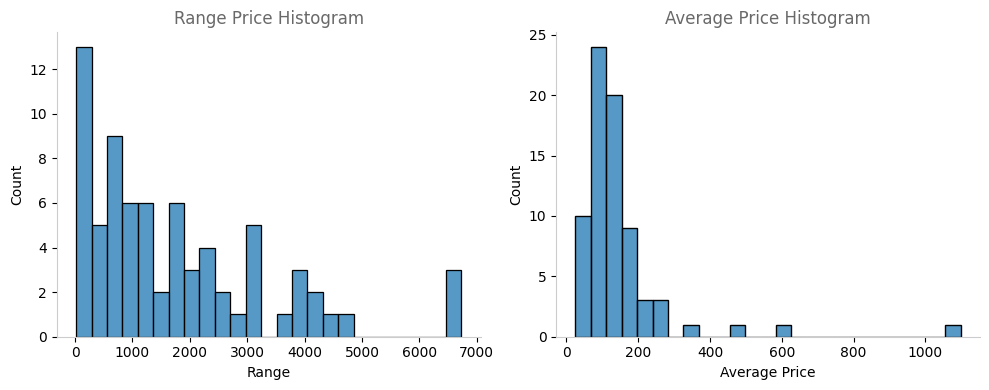

In [ ]:
#Display Range and Average Price Histogram
products, minimal, maximal, rata = [], [], [], []

for prod in list(order_history['product_category_name'].dropna().unique()):
    products.append(prod)
    minimal.append(order_history[order_history['product_category_name']==prod]['price'].min())
    maximal.append(order_history[order_history['product_category_name']==prod]['price'].max())
    rata.append(order_history[order_history['product_category_name']==prod]['price'].mean())

prod = pd.DataFrame(
    data={
        'Product':products,
        'Minimal Price':minimal,
        'Maximal Price':maximal,
        'Average Price':rata
    }
)

prod['Range'] = prod['Maximal Price'] - prod['Minimal Price']
prod.sort_values(by='Range',ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i, cols in enumerate(['Range','Average Price']):
    sns.histplot(prod[cols], ax=axes[i], bins=25)
    sns.despine()
    axes[i].spines['bottom'].set_color('#CCCCCC'), axes[i].spines['left'].set_color('#CCCCCC')
    plt.tight_layout()
    axes[i].set_title(
        'Range Price Histogram' if i == 0 else 'Average Price Histogram',
        size=12,
        color='dimgrey'
    )

In [ ]:
#Replace product_category_name missing value with value 'others'
order_history.loc[order_history['product_category_name'].isnull(),'product_category_name'] = 'others'

**Review Score Missing Value Imputing**

In [ ]:
#Display review_score missing value with unique order_id, product_id, and product_category_name
display(order_history[order_history['review_score'].isnull()][[
    'order_id','product_id','product_category_name','review_score'
]].head())
order_history[order_history['review_score'].isnull()].info(verbose=False)

,order_id,product_id,product_category_name,review_score
32,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports leisure,NaN
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports leisure,NaN
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports leisure,NaN
89,00335b686d693c7d72deeb12f8e89227,87b08e712cc4c9fe70984c5a24b29e2f,toys,NaN
256,00a77f9cc25b05b2004752593d7b8888,33bd5538a16d23f0a39da1c9bfd20980,home confort,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 32 to 112584
Columns: 26 entries, order_id to customer_state
dtypes: datetime64[ns](5), float64(7), int64(3), object(11)
memory usage: 198.7+ KB


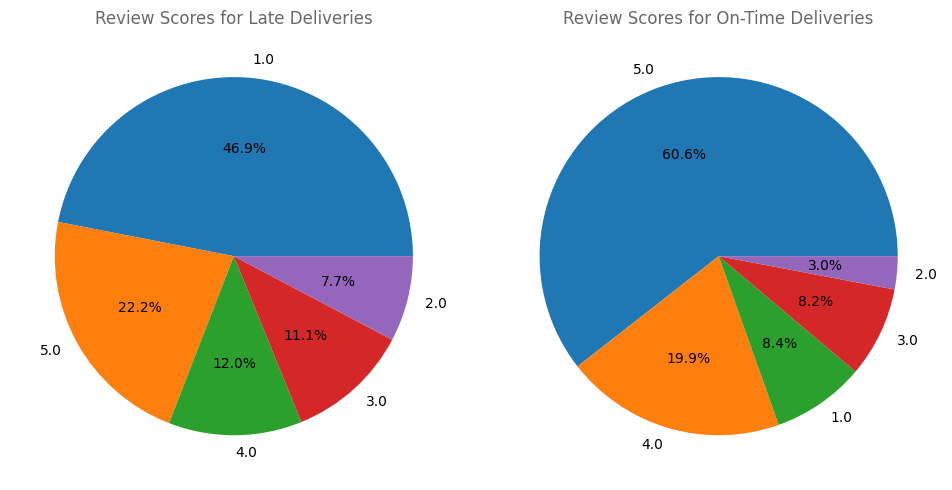

In [ ]:
#Display 2 review_score Pie Plots for Late Deliveries and On-Time Deliveries
order_history['delivery_length'] = order_history['order_delivered_customer_date'] - order_history['order_purchase_timestamp']
order_history['faster_within'] = order_history['order_estimated_delivery_date'] - order_history['order_delivered_customer_date']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i in range(2):
    data = order_history[order_history['faster_within'].dt.days < 0] if i == 0 else \
        order_history[order_history['faster_within'].dt.days >= 0]

    axes[i].pie(
        data['review_score'].value_counts(),
        labels=data['review_score'].value_counts().index,
        autopct='%1.1f%%'
    )
    prompt = 'Late Deliveries' if i == 0 else 'On-Time Deliveries'
    plt.tight_layout()
    axes[i].set_title(
        f'Review Scores for {prompt}',
        size=12,
        color='dimgrey'
    )

📌**Insight:**

Dựa trên hai biểu đồ hình tròn ở trên, có thể thấy rằng khách hàng có xu hướng đánh giá 1 sao cho các giao hàng bị chậm trễ và đánh giá 5 sao cho các giao hàng đúng hẹn.

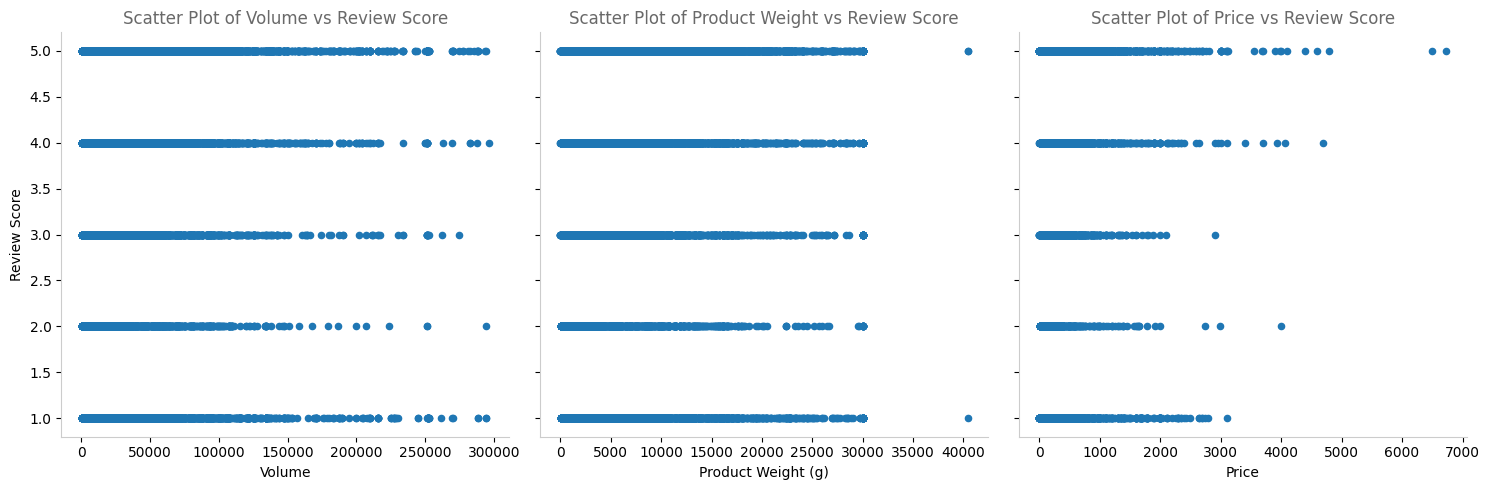

In [ ]:
#Display Volume, Product Weight, and Price vs Review Score Scatter Plot
order_history['volume'] = order_history['product_height_cm'] * order_history['product_width_cm'] * order_history['product_length_cm']

fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15,5),
    sharey=True
)

for i, col in enumerate(['volume','product_weight_g','price']):
    scatter = order_history.plot.scatter(
        x=col,
        y='review_score',
        ax=axes[i]
    )

    prompt = 'Volume' if i == 0 else 'Price' if i == 2 else 'Product Weight'
    axes[i].set_ylabel('Review Score')
    axes[i].set_xlabel('{}{}'.format(prompt,'' if i != 1 else ' (g)'))
    axes[i].set_title(
        f'Scatter Plot of {prompt} vs Review Score',
        size=12,
        color='dimgrey'
    )

    for i in ['left','bottom']:
        scatter.spines[i].set_color('#CCCCCC')

    sns.despine()
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap\n')

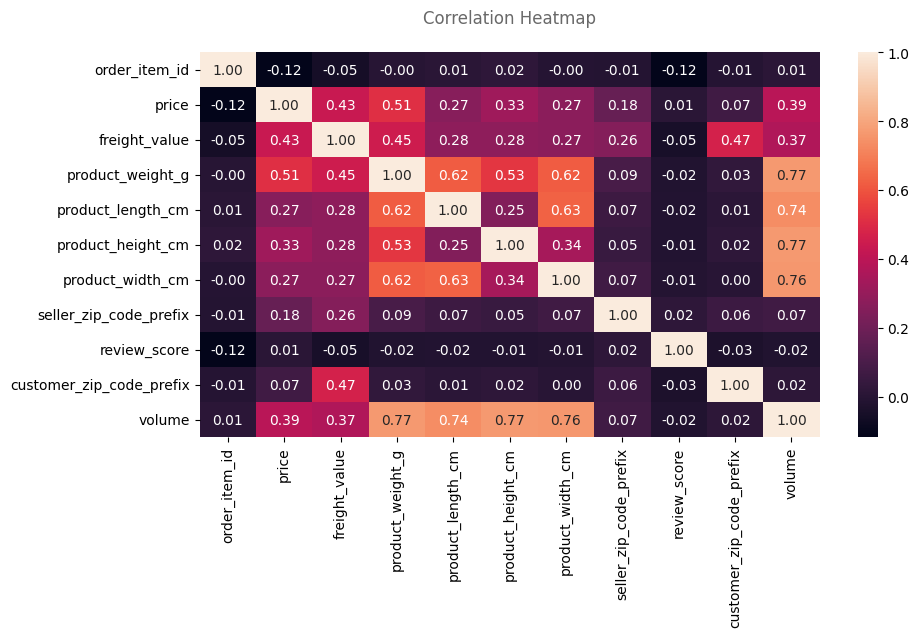

In [ ]:
#Display a Correlation Heatmap from Features in Order History with Spearman Method
plt.figure(figsize=(10,5))
sns.heatmap(
    order_history.corr(numeric_only=True,method='spearman'),
    annot=True,
    fmt='.2f'
)
plt.title(
    'Correlation Heatmap\n',
    size=12,
    color='dimgrey'
)

In [ ]:
#Change review_score datatype to float and replace review_score missing value with mean value
order_history['review_score'] = order_history['review_score'].astype('float')

category_score_dictionary = round(
    order_history.groupby(['product_category_name','product_id'])['review_score'].mean()
).to_dict()

def review_score_mapping(cols):
    try:
        return category_score_dictionary[(cols[0],cols[1])]
    except:
        return np.nan

review_null = order_history['review_score'].isnull()
order_history.loc[review_null,'review_score'] = order_history[review_null]\
    [['product_category_name','product_id']].apply(review_score_mapping,axis=1)

order_history.drop(
    index=order_history[order_history['review_score'].isnull()].index,
    inplace=True
)

**Delivered Carrier and Customer Date Missing Value Imputing**

In [ ]:
#Drop order_delivered_carrier_date that have smaller value than order_purchase_timestamp
display(order_history[order_history['order_delivered_carrier_date']<order_history['order_purchase_timestamp']][[
    'order_purchase_timestamp','order_delivered_carrier_date'
]].head())
order_history[order_history['order_delivered_carrier_date']<order_history['order_purchase_timestamp']].info(verbose=False)

order_history.drop(
    index=order_history[order_history['order_delivered_carrier_date']<order_history['order_purchase_timestamp']].index,
    inplace=True
)

,order_purchase_timestamp,order_delivered_carrier_date
344,2018-06-11 12:24:48,2018-06-11 12:05:00
575,2018-05-15 15:13:06,2018-05-15 14:58:00
1960,2018-08-08 13:18:36,2018-08-08 12:19:00
3516,2018-08-06 09:17:53,2018-08-06 08:44:00
3824,2018-06-27 11:16:44,2018-06-27 10:57:00


<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 344 to 112564
Columns: 29 entries, order_id to volume
dtypes: datetime64[ns](5), float64(8), int64(3), object(11), timedelta64[ns](2)
memory usage: 43.4+ KB


In [ ]:
#Display order_delivered_customer_date and order_delivered_carrier_date missing value
null_date = (order_history['order_delivered_customer_date'].isnull()) | (order_history['order_delivered_carrier_date'].isnull())

display(order_history[null_date].head())
order_history[null_date].info(verbose=False)

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_length,faster_within,volume
79,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,53.98,23.31,bed bath table,800.0,16.0,10.0,16.0,1835b56ce799e6a4dc4eddc053f04066,14940,ibitinga,São Paulo,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,3.0,7fa80efb1ef15ca4104627910c29791c,205d5aa158338f2b733a07326aae8c87,42804,camacari,Bahia,NaT,NaT,2560.0
84,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,39.90,15.38,housewares,200.0,16.0,12.0,11.0,a2deecd5398f5df4987110c80a1972a3,5043,sao paulo,São Paulo,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29,1.0,0dad07848c618cc5a4679a1bfe1db8d2,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,Minas Gerais,NaT,NaT,2112.0
260,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,52.99,22.30,computers accessories,350.0,25.0,11.0,15.0,974cf2cb8f4b7add98709c30df02fe10,14802,araraquara,São Paulo,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,NaT,2018-09-18,5.0,7a399396442d5601cbedfbd0a3cf1da4,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,Bahia,NaT,NaT,4125.0
270,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,27.90,9.26,auto,600.0,16.0,11.0,11.0,bf0d50a6410d487dc97d2baac0a8c0be,13408,piracicaba,São Paulo,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17,2.0,a7e8a3cb55d9c9a536992c6465a46a3f,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,São Paulo,NaT,NaT,1936.0
422,00ff0cf5583758e6964723e42f111bf4,1,bb1fe952bdc16ef8974d4ca11aec19b7,154.90,15.25,health beauty,417.0,16.0,15.0,14.0,b17b679f4f5ce2e03ce6968c62648246,14090,ribeirao preto,São Paulo,canceled,2017-04-10 00:45:56,2017-04-10 01:03:29,NaT,NaT,2017-05-04,1.0,e3626ed5d1f2e3a02d692ec948b25eeb,b9badb100ff8ecc16a403111209e3a06,88025,florianopolis,Santa Catarina,NaT,NaT,3360.0


<class 'pandas.core.frame.DataFrame'>
Index: 2433 entries, 79 to 112421
Columns: 29 entries, order_id to volume
dtypes: datetime64[ns](5), float64(8), int64(3), object(11), timedelta64[ns](2)
memory usage: 570.2+ KB


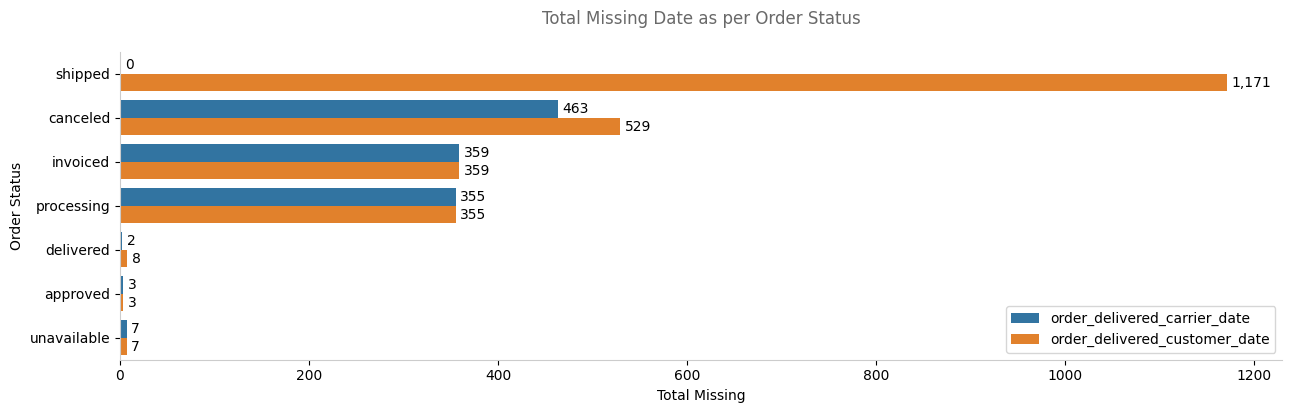

In [ ]:
#Plotting Total Missing Date as per Order Status
total_list = []
status_list = []

for i in order_history[null_date]['order_status'].unique():
    count = order_history[order_history['order_status']==i][[
        'order_delivered_carrier_date','order_delivered_customer_date'
    ]].isnull().sum()

    for j in range(len(count)):
        total_list.append(count[j])
        status_list.append(i)

info_list = ['order_delivered_carrier_date','order_delivered_customer_date']*7

count_missing_df = pd.DataFrame(
    data=[
        total_list,
        status_list,
        info_list
    ]).transpose().rename(
        columns={
            0:'Total Missing',
            1:'Order Status',
            2:'Date Info'
        }
    )

plt.figure(figsize=(15,4))

barplot = sns.barplot(
    count_missing_df,
    x='Total Missing',
    y='Order Status',
    hue='Date Info'
)
for i, val in enumerate(count_missing_df['Total Missing']):
    plt.annotate(
        f'{val:,.0f}',
        xy=(val+5,(i/2)-0.05 if i%2 == 0 else (i/2)-0.125),
        ha='left',
        va='bottom'
    )

for i in ['left','bottom']:
    barplot.spines[i].set_color('#CCCCCC')

sns.despine()
plt.legend(loc=4),
plt.title(
    'Total Missing Date as per Order Status',
    size=12,
    color='dimgrey',
    pad=20
)

plt.show()

📌**Insight:**
Không có giá trị thiếu nào trong cột order_delivered_carrier_date với trạng thái đơn hàng đã được vận chuyển.

In [ ]:
#Drop order_delivered_carrier_date and order_delivered_customer_date missing value
missing_delivery_date = order_history[
    (order_history['order_status']=='delivered') &
    (
        (order_history['order_delivered_carrier_date'].isnull()) |
        (order_history['order_delivered_customer_date'].isnull())
    )
][['order_id','order_delivered_carrier_date','order_delivered_customer_date']]

display(missing_delivery_date)
missing_delivery_date.info(verbose=False)

order_history.drop(
    index=missing_delivery_date.index,
    inplace=True
)

,order_id,order_delivered_carrier_date,order_delivered_customer_date
5841,0d3268bad9b086af767785e3f0fc0133,2018-07-03 09:28:00,NaT
14472,20edc82cf5400ce95e1afacc25798b31,2018-07-03 19:26:00,NaT
18554,2aa91108853cecb43c84a5dc5b277475,NaT,2017-11-20 19:44:47
19642,2d1e2d5bf4dc7227b3bfebb81328c15f,2017-11-30 18:12:23,NaT
19838,2d858f451373b04fb5c984a1cc2defaf,NaT,NaT
20393,2ebdfc4f15f23b91474edf87475f108e,2018-07-03 13:57:00,NaT
75303,ab7c89dc1bf4a1ead9d6ec1ec8968a84,2018-06-12 14:10:00,NaT
101642,e69f75a717d64fc5ecdfae42b2e8e086,2018-07-03 13:57:00,NaT
108192,f5dd62b788049ad9fc0526e3ad11a097,2018-06-25 08:05:00,NaT


<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 5841 to 108192
Columns: 3 entries, order_id to order_delivered_customer_date
dtypes: datetime64[ns](2), object(1)
memory usage: 288.0+ bytes


**Missing Value of Customer Payments**

In [ ]:
#Display Features from Customer Payments with missing value
customer_payments.isnull().sum()

order_id                    0
customer_unique_id          0
order_purchase_timestamp    0
payment_sequential          1
payment_type                1
payment_installments        1
payment_value               1
dtype: int64

In [ ]:
#Drop payment_sequential, payment_type, payment_installments, and payment_value missing value
customer_payments.dropna(axis=0,inplace=True)

## **EDA PART 2**

### **Historical Purchase Analysis**

In [ ]:
#Make a new Dataframe named eda_df with a order_purchase_timestamp break value to 'year','month','month_name','year_month','date','day','dayofweek','dayofweek_name','hour' columns
eda_df = order_history.groupby('order_id')[[
    'order_id',
    'customer_unique_id','customer_zip_code_prefix','customer_city','customer_state',
    'seller_id','seller_zip_code_prefix','seller_city','seller_state',
    'order_purchase_timestamp'
]].head(1)
cols = ['year','month','month_name','year_month','date','day','dayofweek','dayofweek_name','hour']

for i, col in enumerate(cols):
    eda_df['order_purchase_'+col] = eda_df['order_purchase_timestamp'].apply(
        lambda x: x.year if i == 0 else x.month if i == 1 else x.strftime('%b') if i == 2 else\
            x.strftime('%Y%m') if i == 3 else x.strftime('%Y%m%d') if i == 4 else x.day if i == 5 else\
                x.dayofweek if i == 6 else x.strftime('%a') if i == 7 else x.hour
    )

eda_df['order_purchase_time_day'] = pd.cut(
    x=eda_df['order_purchase_hour'],
    bins=[-0.1, 6, 12, 18, 23],
    labels=['Dawn','Morning','Afternoon','Night']
)

display(eda_df.head())
eda_df.info(verbose=False)

,order_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_purchase_timestamp,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,Rio de Janeiro,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,São Paulo,2017-09-13 08:59:02,2017,9,Sep,201709,20170913,13,2,Wed,8,Morning
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,São Paulo,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,São Paulo,2017-04-26 10:53:06,2017,4,Apr,201704,20170426,26,2,Wed,10,Morning
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,Minas Gerais,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,Minas Gerais,2018-01-14 14:33:31,2018,1,Jan,201801,20180114,14,6,Sun,14,Afternoon
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,São Paulo,9d7a1d34a5052409006425275ba1c2b4,14403,franca,São Paulo,2018-08-08 10:00:35,2018,8,Aug,201808,20180808,8,2,Wed,10,Morning
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,São Paulo,df560393f3a51e74553ab94004ba5c87,87900,loanda,Paraná,2017-02-04 13:57:51,2017,2,Feb,201702,20170204,4,5,Sat,13,Afternoon


<class 'pandas.core.frame.DataFrame'>
Index: 98317 entries, 0 to 112649
Columns: 20 entries, order_id to order_purchase_time_day
dtypes: category(1), datetime64[ns](1), int64(7), object(11)
memory usage: 15.1+ MB


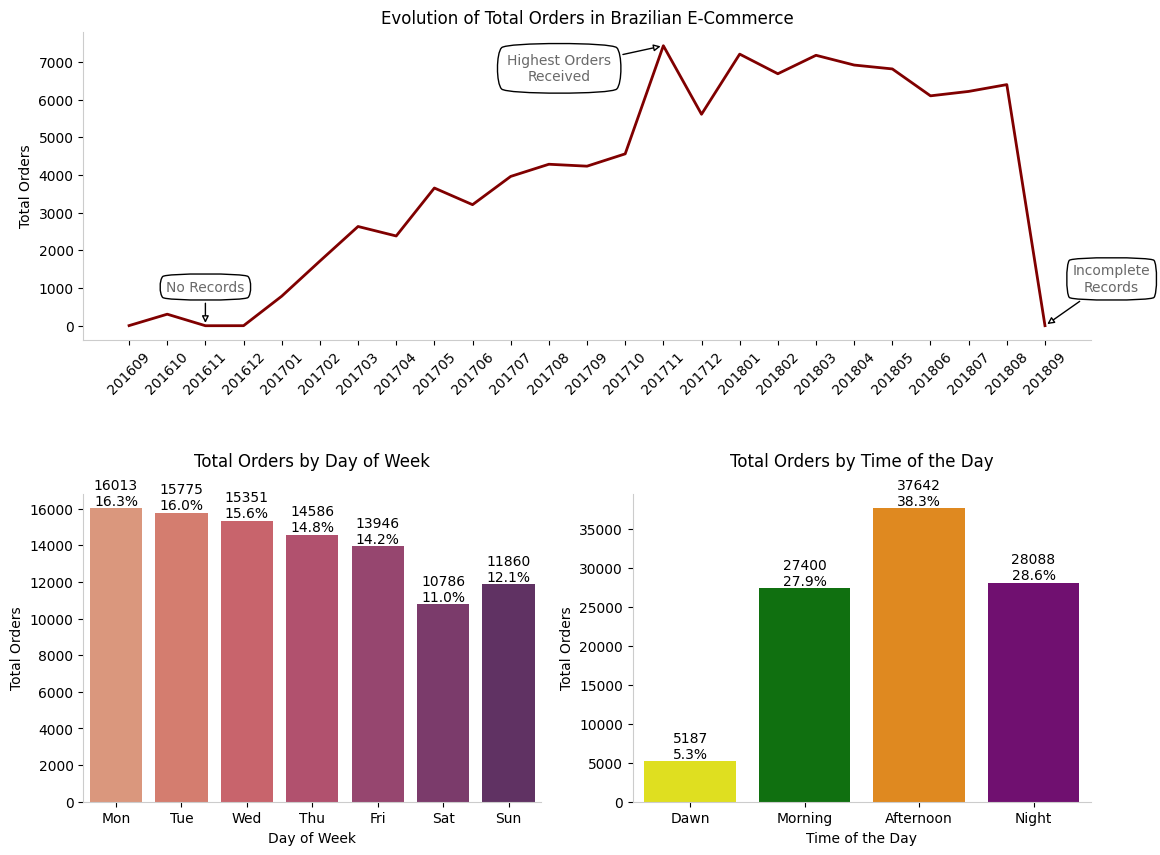

In [ ]:
#Make an Evolution of Total Orders in Brazilian E-Commerce Plot
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig, hspace=.5)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

# Lineplot - Evolution of e-commerce orders along time
new_series = pd.concat([eda_df['order_purchase_year_month'].value_counts(), pd.Series({'201611': 0})])
sns.lineplot(
    data=new_series.sort_index(),
    ax=ax1,
    color='maroon',
    linewidth=2
)


ax1.annotate(
    f'Highest Orders\nReceived',
    xy=(14,7432),
    xytext=(-75,-25),
    textcoords='offset points',
    bbox=dict(
        boxstyle="round4",
        fc="w",
        pad=.8
    ),
    arrowprops=dict(
        arrowstyle='-|>',
        fc='w'
    ),
    color='dimgrey',
    ha='center'
)

ax1.annotate(
    f'Incomplete\nRecords',
    xy=(24,0),
    xytext=(48,25),
    textcoords='offset points',
    bbox=dict(
        boxstyle="round4",
        fc="w",
        pad=.5
    ),
    arrowprops=dict(
        arrowstyle='-|>',
        fc='w'
    ),
    color='dimgrey',
    ha='center'
)

ax1.annotate(
    f'No Records',
    xy=(2,0),
    xytext=(0,25),
    textcoords='offset points',
    bbox=dict(
        boxstyle="round4",
        fc="w",
        pad=.5
    ),
    arrowprops=dict(
        arrowstyle='-|>',
        fc='w'
    ),
    color='dimgrey',
    ha='center'
)

format_spines(ax1, right_border=False)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax1.set_title(
    'Evolution of Total Orders in Brazilian E-Commerce',
    size=12,
    color='black'
)

ax1.set_ylabel('Total Orders')

# Barchart - Total of orders by day of week
single_countplot(
    eda_df,
    x='order_purchase_dayofweek',
    ax=ax2,
    order=False,
    palette='flare'
)

ax2.set_xlabel('Day of Week'), ax2.set_ylabel('Total Orders')
ax2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax2.set_title(
    'Total Orders by Day of Week',
    size=12,
    color='black',
    pad=20
)

# Barchart - Total of orders by time of the day
single_countplot(
    eda_df,
    x='order_purchase_time_day',
    ax=ax3,
    order=False,
    palette=['yellow','green','darkorange','purple']
)

ax3.set_title(
    'Total Orders by Time of the Day',
    size=12,
    color='black',
    pad=20
)

ax3.set_xlabel('Time of the Day')
ax3.set_ylabel('Total Orders')
plt.tight_layout()
plt.show()

### **Sales Performance Between 2017 and 2018 (Q1-Q2)**

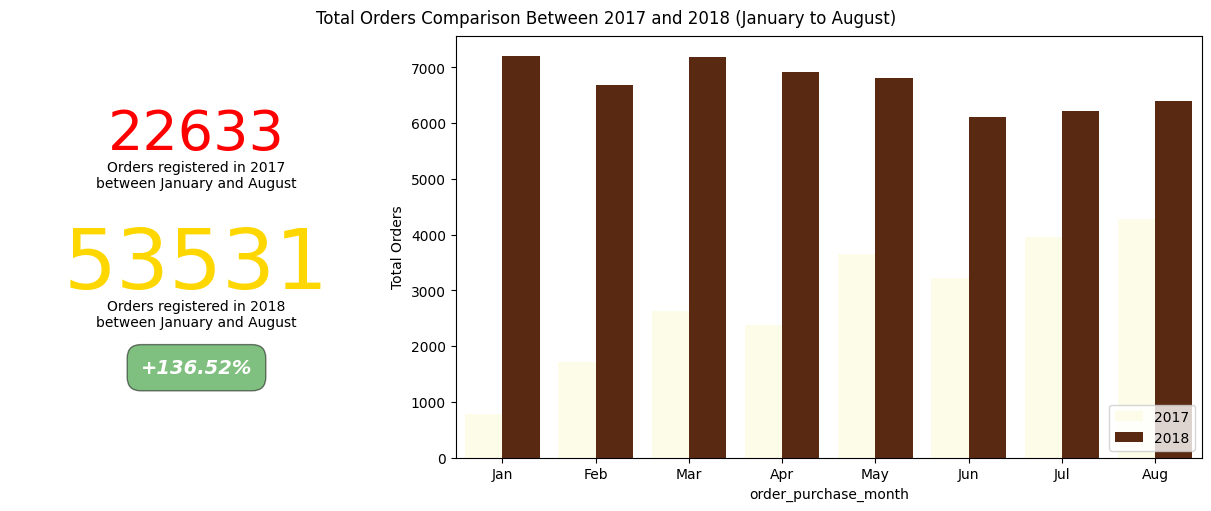

In [ ]:
#Make a Total Orders Comparison Between 2017 and 2018 (January to August) Plot
fig = plt.figure(constrained_layout=True, figsize=(12, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on e-commerce orders between 2017 and 2018
df_orders_compare = eda_df.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = df_orders_compare['order_purchase_year'].value_counts()
growth = round(100*((year_orders[2018]-year_orders[2017])/year_orders[2017]),2)
ax1.text(
    x=0.5,
    y=0.73,
    s=f'{year_orders[2017]}',
    fontsize=40,
    color='red',
    ha='center'
)

ax1.text(
    x=0.5,
    y=0.64,
    s='Orders registered in 2017\nbetween January and August',
    fontsize=10,
    ha='center'
)

ax1.text(
    x=0.5,
    y=0.40,
    s=f'{year_orders[2018]}',
    fontsize=60,
    color='gold',
    ha='center'
)

ax1.text(
    x=0.5,
    y=0.31,
    s='Orders registered in 2018\nbetween January and August',
    fontsize=10,
    ha='center'
)

signal = '+' if growth > 0 else '-'
ax1.text(
    x=0.5,
    y=0.20,
    s=f'{signal}{growth}%',
    fontsize=14,
    ha='center',
    color='white',
    style='italic',
    weight='bold',
    bbox=dict(
        facecolor='green',
        alpha=0.5,
        pad=10,
        boxstyle='round, pad=.7'
    )
)

ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2018
sns.countplot(
    data=df_orders_compare,
    x='order_purchase_month',
    hue='order_purchase_year',
    ax=ax2,
    palette='YlOrBr'
)

ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
ax2.set_ylabel('Total Orders')
plt.suptitle(
    'Total Orders Comparison Between 2017 and 2018 (January to August)',
    size=12,
    color='black'
)

plt.legend(loc='lower right')
plt.show()

### **Order Tracking and Reporting**

In [ ]:
# Filtered orders only from January 2017
eda_df = eda_df[
    (eda_df['order_purchase_year_month'].astype(int) >= 201701) &
    (eda_df['order_purchase_year_month'].astype(int) <= 201808)
]

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content).rename(
    columns={
        'sigla':'state_code',
        'nome':'state_name',
        'regiao':'region'
    }
)

def english_region(cols):
    region_dict = {
        'Norte':'North',
        'Nordeste':'Northeast',
        'Sudeste':'Southeast',
        'Sul':'South',
        'Centro-Oeste':'Midwest'
    }
    return region_dict.setdefault(cols)

br_info['region'] = br_info['region'].apply(lambda x: x['nome'])
br_info['region'] = br_info['region'].apply(english_region)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(
    'geolocation_zip_code_prefix', as_index=False
).mean()

eda_df = eda_df.merge(
    br_info[['state_name','region']],
    how='left',
    left_on='customer_state',
    right_on='state_name'
).drop('state_name',axis=1)

eda_df = eda_df.merge(
    geo_group,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
).drop(
    'geolocation_zip_code_prefix',axis=1
).dropna(axis=0)

eda_df.drop(
    index=eda_df[eda_df['order_purchase_year_month']=='201809'].index,
    inplace=True
)

# Grouping data by region
df_regions_group = eda_df.groupby(
    ['order_purchase_year_month','region'],
    as_index=False
).agg({
    'customer_unique_id':'count'
}).sort_values(by='order_purchase_year_month')

df_regions_group.columns = ['month','region','order_count']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city
df_cities_group = eda_df.groupby(
    'customer_city',
    as_index=False
).count().loc[:,['customer_city','order_id']]

df_cities_group = df_cities_group.sort_values(
    'order_id',
    ascending=False
).reset_index(drop=True)

# Grouping data by state
df_states_group = eda_df.groupby(
    'customer_state',
    as_index=False
).count().loc[:,['customer_state','order_id']]

df_states_group = df_states_group.sort_values(
    'order_id',
    ascending=False
).reset_index(drop=True)
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = GridSpec(2, 2, figure=fig, wspace=.25, hspace=.35)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# Count of orders by region
sns.lineplot(
    data=df_regions_group,
    x='month',
    y='order_count',
    ax=ax1,
    hue='region',
    size='region',
    style='region',
    palette='viridis',
    markers=['o'] * 5
)

format_spines(ax1,right_border=False)
ax1.set_xlabel('Period'), ax1.set_ylabel('Total Orders')
ax1.set_title(
    'Evolution of E-Commerce Orders on Brazilian Regions',
    size=12,
    color='black'
)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()

# Top cities with more customers orders in Brazil
sns.barplot(
    data=df_states_group.head(10),
    x='order_id',
    y='customer_state',
    ax=ax2,
    palette='flare'
)

for i, val in enumerate(df_states_group.head(10)['order_id']):
    ax2.annotate(
        '{:.2f} %'.format(100*(val/sum(df_states_group['order_id']))),
        xy=(val,i),
        ha='left',
        va='center'
    )

format_spines(ax2,right_border=False)
ax2.set_xlabel('Total Orders'), ax2.set_ylabel('')
ax2.set_title(
    'Top 10 Brazilian State Orders',
    size=12,
    color='black'
)

# Total orders by state
sns.barplot(
    data=df_cities_group.head(20),
    x='order_id',
    y='customer_city',
    ax=ax3,
    palette='magma'
)

for i, val in enumerate(df_cities_group.head(20)['order_id']):
    ax3.annotate(
        '{:.2f} %'.format(100*(val/sum(df_cities_group['order_id']))),
        xy=(val,i),
        ha='left',
        va='center'
    )

format_spines(ax3,right_border=False)
ax3.set_title('Total 20 Brazilian City Orders', size=12, color='black')
ax3.set_xlabel('Total Orders'), ax3.set_ylabel('')
plt.show()

TypeError: Could not convert sao paulosao paulosao paulosao paulosao paulosao paulosao paulosão paulosao paulosao paulosão paulosao paulosao paulosao paulosao paulosao paulosao paulosao paulosao paulosao paulosao paulosao paulosao paulosão paulosao paulosao paulo to numeric

In [ ]:
# Zipping locations
lats = list(eda_df['geolocation_lat'].values)
longs = list(eda_df['geolocation_lng'].values)
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

In [ ]:
# Grouping geolocation data for plotting a heatmap
heat_data = eda_df.groupby(
    ['geolocation_lat','geolocation_lng'],
    as_index=False
).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50],
    zoom_start=4.0,
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Heatmap',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

map1

In [ ]:
#Display Heatmap with Time Changing
epoch_list = []
time_index = eda_df['order_purchase_year_month'].sort_values().unique()

for epoch in time_index:
    data_temp = eda_df.query('order_purchase_year_month == @epoch')
    data_temp = data_temp.groupby(
        ['geolocation_lat','geolocation_lng'],
        as_index=False
    ).count()

    data_temp = data_temp.sort_values(
        'order_id', ascending=False
    ).iloc[:, :3]

    epoch_list.append(data_temp.values.tolist())

# Creating a mapa using folium
map2 = folium.Map(
    location=[-15, -50],
    zoom_start=4.0,
    tiles='cartodbdark_matter'
)

# Plugin: HeatMapWithTime
HeatMapWithTime(
    name='Evolution of Orders in a Geolocation Perspective',
    data=epoch_list,
    radius=10,
    index=list(time_index)
).add_to(map2)

map2

# **4. Preprocessing (for NLP/Topic Modelling)**

## **4.1. Merge Data & Clean Data for TM**

In [ ]:
!pip install git+https://git@github.com/kavgan/word_cloud.git
!pip install translate
!pip install shap
# !pip install lime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import nltk
import string
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import RSLPStemmer
from sklearn.decomposition import LatentDirichletAllocation

# lemmatizer = WordNetLemmatizer()
# import lime
# import lime.lime_tabular

import shap
import warnings
from translate import Translator
translator= Translator(to_lang="en",from_lang='pt')
translator.translate("crianças")

  Cloning https://****@github.com/kavgan/word_cloud.git to /tmp/pip-req-build-znnsy11y
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/kavgan/word_cloud.git' /tmp/pip-req-build-znnsy11y
  Resolved https://****@github.com/kavgan/word_cloud.git to commit 7a5a43a4725e01226e728e5bf398f6c3df487b34
  Preparing metadata (setup.py) ... done
  Created wheel for word-cloud: filename=word_cloud-0.0.0-py3-none-any.whl size=5873 sha256=4ea56fcb9aa205d73bddbefc98673470b39be131cce7680b30bacf150afb7adc
  Stored in directory: /tmp/pip-ephem-wheel-cache-peg8zzar/wheels/15/33/2e/6a4713311a79f4b0aa0ac4773dbeb1506105bae7ca7d748da0
Successfully built word-cloud
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.3 MB/s eta 0:00:00


'child'

In [ ]:
merged_data = pd.merge(order_history, order_reviews[['order_id', 'review_comment_title', 'review_comment_message']], on='order_id', how='left')
display(merged_data.head())
merged_data.info(verbose=False)

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_length,faster_within,volume,review_comment_title,review_comment_message
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,São Paulo,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,5.0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,Rio de Janeiro,7 days 14:44:46,8 days 00:16:12,3528.0,NaN,"Perfeito, produto entregue antes do combinado."
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,São Paulo,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,4.0,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,São Paulo,16 days 05:11:18,2 days 07:55:36,60000.0,NaN,NaN
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,furniture decor,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,Minas Gerais,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,5.0,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,Minas Gerais,7 days 22:45:45,13 days 10:40:44,14157.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumery,200.0,16.0,10.0,15.0,9d7a1d34a5052409006425275ba1c2b4,14403,franca,São Paulo,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,São Paulo,6 days 03:32:04,5 days 10:27:21,2400.0,NaN,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,garden tools,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,loanda,Paraná,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,5.0,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,São Paulo,25 days 02:44:40,15 days 07:17:29,42000.0,NaN,Gostei pois veio no prazo determinado .


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112880 entries, 0 to 112879
Columns: 31 entries, order_id to review_comment_message
dtypes: datetime64[ns](5), float64(8), int64(3), object(13), timedelta64[ns](2)
memory usage: 26.7+ MB


In [ ]:
merged_data.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
price                                0
freight_value                        0
product_category_name                0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
seller_id                            0
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date      1196
order_delivered_customer_date     2445
order_estimated_delivery_date        0
review_score                         0
customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state           

In [ ]:
merged_data = merged_data.dropna()
merged_data.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_id                        0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_score                     0
customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
delivery_length                  0
faster_within                    0
volume              

In [ ]:
print(merged_data['order_id'].shape[0])

11183


## **4.2. Regular Expressions**


### **4.2.1 Breakline and Carriage Return**

In [ ]:
def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

In [ ]:
# Creating a list of comment reviews
reviews = list(merged_data['review_comment_message'].values)

# Applying RegEx
reviews_breakline = re_breakline(reviews)
merged_data['re_breakline'] = reviews_breakline

# Verifying results
# Verifying results for index 48
print("Original review:", reviews[48])
print("Review after applying regex:", reviews_breakline[48])

Original review: Tudo certo recomendo
Review after applying regex: Tudo certo recomendo


### **4.2.2 Sites and Hiperlinks**

In [ ]:
def re_hiperlinks(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

In [ ]:
# Applying RegEx
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
merged_data['re_hiperlinks'] = reviews_hiperlinks

# Verifying results
print("Original review:", reviews[10796])
print("Review after applying regex:", reviews_breakline[10796])

Original review: Adorei
Review after applying regex: Adorei


### **4.2.3. Dates**

In [ ]:
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' data ', r) for r in text_list]

In [ ]:
# Applying RegEx
reviews_dates = re_dates(reviews_hiperlinks)
merged_data['re_dates'] = reviews_dates

# Verifying results
print("Original review:", reviews[665])
print("Review after applying regex:", reviews_dates[665])

Original review: Super recomendo
Review after applying regex: Super recomendo


### **4.2.4 Money**

In [ ]:
def re_money(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]

In [ ]:
# Applying RegEx
reviews_money = re_money(reviews_dates)
merged_data['re_money'] = reviews_money

# Verifying results
print("Original review:", reviews[1665])
print("Review after applying regex:", reviews_money[1665])


Original review: entrega 14 dias antes do prazo estabelecido
Review after applying regex: entrega 14 dias antes do prazo estabelecido


### **4.2.5 Numbers**

In [ ]:
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """

    # Applying regex
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]

In [ ]:
# Applying RegEx
reviews_numbers = re_numbers(reviews_money)
merged_data['re_numbers'] = reviews_numbers

# Verifying results
print("Original review:", reviews[1665])
print("Review after applying regex:", reviews_numbers[1665])

Original review: entrega 14 dias antes do prazo estabelecido
Review after applying regex: entrega  numero  dias antes do prazo estabelecido


### **4.2.6 Negation**

In [ ]:
def re_negation(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """

    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', r) for r in text_list]

In [ ]:
# Applying RegEx
reviews_negation = re_negation(reviews_numbers)
merged_data['re_negation'] = reviews_negation

# Verifying results
print("Original review:", reviews[4783])
print("Review after applying regex:", reviews_negation[4783])

Original review: Gostei, pequeno, delicado e lindo!
Review after applying regex: Gostei, pequeno, delicado e lindo!


### **4.2.7 Special Characteres**

In [ ]:
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """

    # Applying regex
    return [re.sub('\W', ' ', r) for r in text_list]

In [ ]:
# Applying RegEx
reviews_special_chars = re_special_chars(reviews_negation)
merged_data['re_special_chars'] = reviews_special_chars

# Verifying results
print("Original review:", reviews[4783])
print("Review after applying regex:", reviews_special_chars[4783])

Original review: Gostei, pequeno, delicado e lindo!
Review after applying regex: Gostei  pequeno  delicado e lindo 


### **4.2.8 Additional Whitespaces**

In [ ]:
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """

    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

In [ ]:
# Applying RegEx
reviews_whitespaces = re_whitespaces(reviews_special_chars)
merged_data['re_whitespaces'] = reviews_whitespaces

# Verifying results
print("Original review:", reviews[4783])
print("Review after applying regex:", reviews_whitespaces[4783])

Original review: Gostei, pequeno, delicado e lindo!
Review after applying regex: Gostei pequeno delicado e lindo


In [ ]:
merged_data.head()

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_length,faster_within,volume,review_comment_title,review_comment_message,re_breakline,re_hiperlinks,re_dates,re_money,re_numbers,re_negation,re_special_chars,re_whitespaces
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,74.0,23.32,bed bath table,1383.0,50.0,10.0,40.0,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,São Paulo,delivered,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22,5.0,5d178120c29c61748ea95bac23cb8f25,7ed0ea20347f67fe61d1c99fdf8556ae,21810,rio de janeiro,Rio de Janeiro,6 days 07:59:58,21 days 22:55:45,20000.0,Boa,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line,Excelente serviço de compras on line
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,144.0,8.77,perfumery,468.0,23.0,18.0,19.0,fe2032dab1a61af8794248c8196565c9,13030,campinas,São Paulo,delivered,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22,1.0,fff5169e583fd07fac9fec88962f189d,6457be0b331148fb5454efc88d1e03d9,13458,santa barbara d'oeste,São Paulo,6 days 20:12:53,3 days 07:13:29,7866.0,produto não entregue,"Mudo minha opinião assim que receber o produto.\r\nConsta no site que o produto foi entregue, ma...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...",Mudo minha opinião assim que receber o produto Consta no site que o produto foi entregue mas ...,Mudo minha opinião assim que receber o produto Consta no site que o produto foi entregue mas neg...
28,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,27.9,7.94,food,150.0,17.0,13.0,13.0,16090f2ca825584b5a147ab24aa30c86,12940,atibaia,São Paulo,delivered,2018-06-11 21:17:00,2018-06-12 05:16:24,2018-06-12 14:22:00,2018-06-13 15:28:25,2018-06-20,5.0,47d656c08a282ec5ab4c1f18303a3a30,b5910f24d2483d697b37e3857b621061,9820,sao bernardo do campo,São Paulo,1 days 18:11:25,6 days 08:31:35,2873.0,Super Recomendo,"Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.",Produto entregue adequadamente e muito rápido gostei muito do serviço,Produto entregue adequadamente e muito rápido gostei muito do serviço
53,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,35.9,15.20,health beauty,1614.0,31.0,16.0,28.0,2a84855fd20af891be03bc5924d2b453,30111,belo horizonte,

## **4.3 Stopwords**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')# used to import stopwords.
nltk.download('rslp')
# Examples of some portuguese stopwords
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...


Total portuguese stopwords in the nltk.corpous module: 207


[nltk_data]   Unzipping stemmers/rslp.zip.


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [ ]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('portuguese')]
    """

    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [ ]:
# Removing stopwords and looking at some examples
reviews_stopwords = [' '.join(stopwords_removal(review)) for review in reviews_whitespaces]
merged_data['stopwords_removed'] = reviews_stopwords

print("Original review:", reviews_whitespaces[4783])
print("Review after applying regex:", reviews_stopwords[4783])

Original review: Gostei pequeno delicado e lindo
Review after applying regex: gostei pequeno delicado lindo


In [ ]:
merged_data.head()

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_length,faster_within,volume,review_comment_title,review_comment_message,re_breakline,re_hiperlinks,re_dates,re_money,re_numbers,re_negation,re_special_chars,re_whitespaces,stopwords_removed
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,74.0,23.32,bed bath table,1383.0,50.0,10.0,40.0,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,São Paulo,delivered,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22,5.0,5d178120c29c61748ea95bac23cb8f25,7ed0ea20347f67fe61d1c99fdf8556ae,21810,rio de janeiro,Rio de Janeiro,6 days 07:59:58,21 days 22:55:45,20000.0,Boa,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line.,Excelente serviço de compras on line,Excelente serviço de compras on line,excelente serviço compras on line
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,144.0,8.77,perfumery,468.0,23.0,18.0,19.0,fe2032dab1a61af8794248c8196565c9,13030,campinas,São Paulo,delivered,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22,1.0,fff5169e583fd07fac9fec88962f189d,6457be0b331148fb5454efc88d1e03d9,13458,santa barbara d'oeste,São Paulo,6 days 20:12:53,3 days 07:13:29,7866.0,produto não entregue,"Mudo minha opinião assim que receber o produto.\r\nConsta no site que o produto foi entregue, ma...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...","Mudo minha opinião assim que receber o produto. Consta no site que o produto foi entregue, mas ...",Mudo minha opinião assim que receber o produto Consta no site que o produto foi entregue mas ...,Mudo minha opinião assim que receber o produto Consta no site que o produto foi entregue mas neg...,mudo opinião assim receber produto consta site produto entregue negação recebi
28,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,27.9,7.94,food,150.0,17.0,13.0,13.0,16090f2ca825584b5a147ab24aa30c86,12940,atibaia,São Paulo,delivered,2018-06-11 21:17:00,2018-06-12 05:16:24,2018-06-12 14:22:00,2018-06-13 15:28:25,2018-06-20,5.0,47d656c08a282ec5ab4c1f18303a3a30,b5910f24d2483d697b37e3857b621061,9820,sao bernardo do campo,São Paulo,1 days 18:11:25,6 days 08:31:35,2873.0,Super Recomendo,"Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.","Produto entregue adequadamente e muito rápido, gostei muito do serviço.",Produto entregue adequadamente e muito rápido gostei muito do serviço,Produto entregue adequadamente e muito rápido gostei muito do serviço,produto entregue adequadamente rápido gos

## **4.4. Comeback Customer**

### **Tìm đơn hàng đầu tiên của tất cả các khách hàng**

In [ ]:
temp2=merged_data.groupby('customer_unique_id')['order_id'].count()

In [ ]:
# "Comeback"-customers are customers which has more than one order:
come_back_persons=temp2[temp2>1]

In [ ]:
first_order_day=merged_data[merged_data['customer_unique_id'].isin(come_back_persons.index)].groupby('customer_unique_id')['order_purchase_timestamp'].min()

In [ ]:
comeback_persons_first_order=merged_data[merged_data['customer_unique_id'].isin(come_back_persons.index) & (merged_data['order_purchase_timestamp'].isin(first_order_day.values))]

In [ ]:
# All come-back customers first orders:
comeback_persons_first_order.head()

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_length,faster_within,volume,review_comment_title,review_comment_message,re_breakline,re_hiperlinks,re_dates,re_money,re_numbers,re_negation,re_special_chars,re_whitespaces,stopwords_removed
209,008d9bf350ff02ed444b3452cf3f57e0,1,efec0b0b076ce3f164b80145743ebc02,9.99,15.23,toys,245.0,18.0,12.0,13.0,1da3aeb70d7989d1e6d9b0e887f97c23,4265,sao paulo,São Paulo,delivered,2018-06-04 08:57:02,2018-06-04 09:11:48,2018-06-04 12:19:00,2018-06-13 19:24:52,2018-07-11,5.0,84f30d2805ae1bddbe5deefc84c80cd0,0511b00dba27c937d7c1b15aa385359e,29101,vila velha,Espírito Santo,9 days 10:27:50,27 days 04:35:08,2808.0,super recomendo,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto,Extrema pontualidade e ótimo produto,extrema pontualidade ótimo produto
210,008d9bf350ff02ed444b3452cf3f57e0,2,efec0b0b076ce3f164b80145743ebc02,9.99,15.23,toys,245.0,18.0,12.0,13.0,1da3aeb70d7989d1e6d9b0e887f97c23,4265,sao paulo,São Paulo,delivered,2018-06-04 08:57:02,2018-06-04 09:11:48,2018-06-04 12:19:00,2018-06-13 19:24:52,2018-07-11,5.0,84f30d2805ae1bddbe5deefc84c80cd0,0511b00dba27c937d7c1b15aa385359e,29101,vila velha,Espírito Santo,9 days 10:27:50,27 days 04:35:08,2808.0,super recomendo,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto.,Extrema pontualidade e ótimo produto,Extrema pontualidade e ótimo produto,extrema pontualidade ótimo produto
261,00ab210695a17fe10e6b23616ae5bc97,1,c6336fa91fbd87c359e44f5dca5a90ed,39.00,7.53,sports leisure,150.0,16.0,16.0,11.0,4c2b230173bb36f9b240f2b8ac11786e,3933,sao paulo,São Paulo,delivered,2018-06-12 06:19:27,2018-06-12 06:35:05,2018-06-18 11:01:00,2018-06-19 22:12:23,2018-06-26,4.0,c87e0e6aa4b3321adb017785ff605af2,0697142614905a50813d854fa08b8eaf,11425,guaruja,São Paulo,7 days 15:52:56,6 days 01:47:37,2816.0,Boa loja,Bom,Bom,Bom,Bom,Bom,Bom,Bom,Bom,Bom,bom
272,00b1861aeb89afa498404c684148a619,1,7e8067e7e5ce7aec0e2cb7c1a456d112,25.79,23.33,auto,350.0,16.0,15.0,16.0,0691148aee60ca47977c187804f935ae,86010,londrina,Paraná,delivered,2018-08-08 08:18:03,2018-08-08 08:30:14,2018-08-08 15:54:00,2018-08-15 15:12:23,2018-08-24,3.0,b8e531fc27d1abbe69022fc27589b3a1,96e7f8f0dbefaa6e16563ac77d339bf0,21321,rio de janeiro,Rio de Janeiro,7 days 06:54:20,8 days 08:47:37,3840.0,falta de mercadoria,Esclareço que a entrega veio incompleta faltando 01 capa de chuva. solicito providências.,Esclareço que a entrega veio incompleta faltando 01 capa de chuva. solicito providências.,Esclareço que a entrega veio incompleta faltando 01 capa de chuva. solicito providências.,Esclareço que a entrega veio incompleta faltando 01 capa de chuva. solicito providências.,Esclareço que a entrega veio incompleta faltando 01 capa de chuva. solicito providências.,Esclareço que a entrega veio incompleta faltando numero capa de chuva. solicito providências.,Esclareço que a entrega veio incompleta faltando numero capa de chuva. solicito providências.,Esclareço que a entrega veio incompleta faltando numero capa de chuva solicito providências,Esclareço que a entrega veio incompleta faltando numero capa de chuva solicito providências,esclareço entrega veio incompleta falt

### **Xác định đơn hàng đầu tiên quay trở lại của khách hàng quay có nhiều hơn 1 đơn hàng**

In [ ]:
# find the first timestamp for each unique customer,
first_order_day_all=merged_data.groupby('customer_unique_id')['order_purchase_timestamp'].min()

In [ ]:
#  find all customers first order:
all_persons_first_order=merged_data[merged_data['order_purchase_timestamp'].isin(first_order_day_all.values)]

In [ ]:
CP_list=list(comeback_persons_first_order['order_purchase_timestamp'])

In [ ]:
# insert 1 if it is the first order of a come-back customer else 0.
from datetime import datetime
tic = datetime.now()

all_persons_first_order['Comeback'] = all_persons_first_order['order_purchase_timestamp'].apply(lambda x: 1 if (x in CP_list)==True else 0)

print("Running time {}:".format(datetime.now() - tic))

Running time 0:00:01.987384:


In [ ]:
all_persons_first_order['order_purchase_timestamp']=pd.to_datetime(all_persons_first_order['order_purchase_timestamp'])

In [ ]:
all_persons_first_order_2017_2018=all_persons_first_order[all_persons_first_order['order_purchase_timestamp']<= '2018-12-12']

In [ ]:
all_persons_first_order_2017_2018['order_purchase_timestamp'].max()

Timestamp('2018-08-29 14:18:28')

## **4.5. Balance data**

Bộ dữ liệu có nhiều lượt rời bỏ hơn là số lượt trở lại. Vì vậy, để đảm bảo việc tìm hiểu như nhau về cả hai nhóm, nhóm sẽ cân bằng tập dữ liệu.

In [ ]:
# The number of orders which are non-comebacks:
len(all_persons_first_order_2017_2018[all_persons_first_order_2017_2018['Comeback']==0])

8076

In [ ]:
# The number of orders which are comebacks:
len(all_persons_first_order_2017_2018[all_persons_first_order_2017_2018['Comeback']==1])

2999

**Việc phân bổ điểm đánh giá cho những người không trở lại:**

<Axes: >

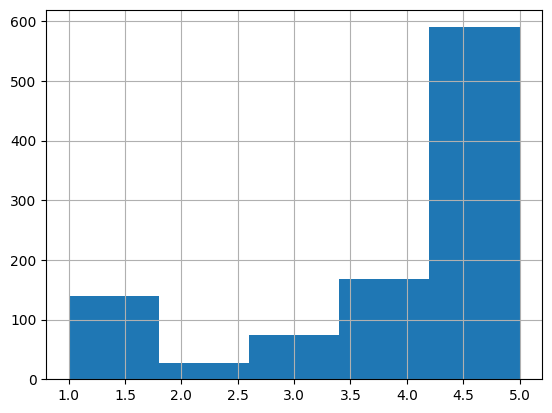

In [ ]:
all_persons_first_order_2017_2018[all_persons_first_order_2017_2018['Comeback']==0]['review_score'].sample(1000).hist(bins=5)

**Việc phân bổ điểm đánh giá cho những người trở lại:**

<Axes: >

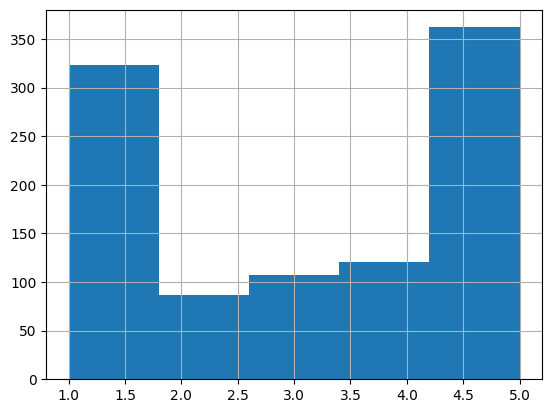

In [ ]:
all_persons_first_order_2017_2018[all_persons_first_order_2017_2018['Comeback']==1]['review_score'].sample(1000).hist(bins=5)

❗Dựa vào phân phối của các điểm đánh giá, thực tế thì số lượng đánh giá 5 là cao nhất. Tuy nhiên, điều đáng chú ý là dù số lượng đánh giá 5 nhiều, nhưng khách hàng trở lại vẫn không hài lòng với đơn hàng. Điều này có thể thấy từ sự gia tăng đáng kể của số lượng đánh giá 1, đứng ở vị trí thứ hai nhiều nhất.

**Begin Balance data**

In [ ]:
from sklearn.utils import resample

def balance_data(df):
    # Separate majority and minority classes
    df_comeback = df[df.Comeback==1]
    df_leave = df[df.Comeback==0]

    # Upsample minority class
    df_comeback_upsampled = resample(df_comeback, replace=True, n_samples=len(df_leave),
                                 random_state=42)

    # Combine majority class with upsampled minority class
    df_balanced = pd.concat([df_leave, df_comeback_upsampled])

    # Display new class counts
    print(df_balanced.Comeback.value_counts())

    return df_balanced

In [ ]:
all_persons_first_order_2017_2018_balanced=balance_data(all_persons_first_order_2017_2018)

Comeback
0    8076
1    8076
Name: count, dtype: int64


**Selecting variables Topic Modelling**

In [ ]:
# all_persons_first_order_2017_2018_balanced['message_clean'] = all_persons_first_order_2017_2018_balanced["stemming"]
all_persons_first_order_2017_2018_balanced['message_clean'] = all_persons_first_order_2017_2018_balanced["stopwords_removed"]
data_final=all_persons_first_order_2017_2018_balanced[['order_id',
       'price', 'freight_value', 'review_score', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_comment_message','message_clean', "volume" ,'Comeback','seller_id','product_category_name']]

In [ ]:
data_final.head(100)

,order_id,price,freight_value,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_comment_message,message_clean,volume,Comeback,seller_id,product_category_name
12,0006ec9db01a64e59a68b2c340bf65a7,74.00,23.32,5.0,1383.0,50.0,10.0,40.0,Excelente serviço de compras on line.,excelente serviço compras on line,20000.0,0,4a3ca9315b744ce9f8e9374361493884,bed bath table
17,000aed2e25dbad2f9ddb70584c5a2ded,144.00,8.77,1.0,468.0,23.0,18.0,19.0,"Mudo minha opinião assim que receber o produto.\r\nConsta no site que o produto foi entregue, ma...",mudo opinião assim receber produto consta site produto entregue negação recebi,7866.0,0,fe2032dab1a61af8794248c8196565c9,perfumery
28,00130c0eee84a3d909e75bc08c5c3ca1,27.90,7.94,5.0,150.0,17.0,13.0,13.0,"Produto entregue adequadamente e muito rápido, gostei muito do serviço.",produto entregue adequadamente rápido gostei serviço,2873.0,0,16090f2ca825584b5a147ab24aa30c86,food
53,001e7cf2ad6bef3ade12ebc56ceaf0f3,35.90,15.20,1.0,1614.0,31.0,16.0,28.0,O produto chegou e estragou sozinho,produto chegou estragou sozinho,13888.0,0,2a84855fd20af891be03bc5924d2b453,health beauty
56,002175704e8b209f61b9ad5cfd92b60e,109.90,13.21,4.0,588.0,19.0,14.0,17.0,Produto como descrito. Mas não gostei pq o som do alarme é muito baixo..,produto descrito negação gostei pq som alarme baixo,4522.0,0,b2ba3715d723d245138f291a6fe42594,audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,02a3c3a1c72dbff557b2f56fc0caa847,25.00,15.28,5.0,250.0,24.0,5.0,11.0,"Chegou antes do prazo,bem embalado e como esperava",chegou antes prazo bem embalado esperava,1320.0,0,4830e40640734fc1c52cd21127c341d4,housewares
1145,02a96427d96112413499795f52a9a4e8,66.30,8.29,5.0,367.0,38.0,21.0,23.0,Produto bom,produto bom,18354.0,0,8f119a0aee85c0c8fc534629734e94fd,construction tools construction
1149,02ac6689fe09c236d7651b93246b6dbe,87.28,6.53,3.0,1550.0,44.0,14.0,34.0,ainda não usei mais recomendo \r\n,ainda negação usei recomendo,20944.0,0,4a3ca9315b744ce9f8e9374361493884,bed bath table
1155,02b089f5e85ee9c52935ede2207b13e7,29.90,7.71,4.0,250.0,16.0,5.0,15.0,"Recebi o produto antes do esperado, gostei dos três itens, o material é bom e a cor é a mesma qu...",recebi produto antes esperado gostei três itens material bom cor mesma queria fronhas veio costu...,1200.0,0,da8622b14eb17ae2831f4ac5b9dab84a,health beauty


**Normalizing and saving final data**

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
y_balanced=data_final['Comeback']
X_balanced=data_final[['price','freight_value','review_score',
            'product_weight_g','product_length_cm',	'product_height_cm',	'product_width_cm','message_clean','volume','seller_id','product_category_name']]

# normalizing the numerical features
X_balanced[['price','freight_value','review_score',
            'product_weight_g','product_length_cm',	'product_height_cm',	'product_width_cm','volume']]=normalize(X_balanced[['price','freight_value','review_score',
            'product_weight_g','product_length_cm',	'product_height_cm',	'product_width_cm','volume']])

y_balanced=y_balanced.reset_index(drop=True)
X_balanced=X_balanced.reset_index(drop=True)

In [ ]:
X_balanced.head(20)

,price,freight_value,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,message_clean,volume,seller_id,product_category_name
0,0.003691,0.001163,0.000249,0.068984,0.002494,0.000499,0.001995,excelente serviço compras on line,0.997605,4a3ca9315b744ce9f8e9374361493884,bed bath table
1,0.018271,0.001113,0.000127,0.059381,0.002918,0.002284,0.002411,mudo opinião assim receber produto consta site produto entregue negação recebi,0.998058,fe2032dab1a61af8794248c8196565c9,perfumery
2,0.009697,0.002760,0.001738,0.052135,0.005909,0.004518,0.004518,produto entregue adequadamente rápido gostei serviço,0.998550,16090f2ca825584b5a147ab24aa30c86,food
3,0.002568,0.001087,0.000072,0.115437,0.002217,0.001144,0.002003,produto chegou estragou sozinho,0.993306,2a84855fd20af891be03bc5924d2b453,health beauty
4,0.024093,0.002896,0.000877,0.128905,0.004165,0.003069,0.003727,produto descrito negação gostei pq som alarme baixo,0.991339,b2ba3715d723d245138f291a6fe42594,audio
5,0.077783,0.005862,0.000997,0.418830,0.007180,0.001795,0.002792,ótimo produto bom acabamento começando nesse estudo sobre universo principalmente estudantes óti...,0.904673,955fee9216a65b617aa5c0531780ce60,sports leisure
6,0.002765,0.001333,0.000040,0.312371,0.001635,0.000141,0.001675,demora absurda entrega dentro prazo especificado ainda sim demorado,0.949952,7c67e1448b00f6e969d365cea6b010ab,office furniture
7,0.009880,0.001938,0.000291,0.063504,0.001745,0.001512,0.001279,produto ótima qualidade sabor ótimo entregue antes prazo,0.997927,c3cfdc648177fdbbbb35635a37472c53,sports leisure
8,0.003141,0.000477,0.000185,0.066519,0.001109,0.001109,0.001109,amei conj entregue rápido conj perfeito,0.997778,53e4c6e0f4312d4d2107a8c9cddf45cd,housewares
9,0.014545,0.052828,0.005195,0.225443,0.018700,0.004156,0.013506,ótimo,0.972418,ef506c96320abeedfb894c34db06f478,telephony


In [ ]:
y_balanced.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Comeback, dtype: int64

# **6. Topic Modeling**

## **Load data**

In [ ]:
df= X_balanced
df_y=y_balanced


In [ ]:
df=df.dropna()
df_y=df_y[df_y.index.isin(df.index)]
print(df.shape)
print(df_y.shape)

(16152, 11)
(16152,)


In [ ]:
df.head(50)

,price,freight_value,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,message_clean,volume,seller_id,product_category_name
0,0.003691,0.001163,0.000249,0.068984,0.002494,0.000499,0.001995,excelente serviço compras on line,0.997605,4a3ca9315b744ce9f8e9374361493884,bed bath table
1,0.018271,0.001113,0.000127,0.059381,0.002918,0.002284,0.002411,mudo opinião assim receber produto consta site produto entregue negação recebi,0.998058,fe2032dab1a61af8794248c8196565c9,perfumery
2,0.009697,0.002760,0.001738,0.052135,0.005909,0.004518,0.004518,produto entregue adequadamente rápido gostei serviço,0.998550,16090f2ca825584b5a147ab24aa30c86,food
3,0.002568,0.001087,0.000072,0.115437,0.002217,0.001144,0.002003,produto chegou estragou sozinho,0.993306,2a84855fd20af891be03bc5924d2b453,health beauty
4,0.024093,0.002896,0.000877,0.128905,0.004165,0.003069,0.003727,produto descrito negação gostei pq som alarme baixo,0.991339,b2ba3715d723d245138f291a6fe42594,audio
5,0.077783,0.005862,0.000997,0.418830,0.007180,0.001795,0.002792,ótimo produto bom acabamento começando nesse estudo sobre universo principalmente estudantes óti...,0.904673,955fee9216a65b617aa5c0531780ce60,sports leisure
6,0.002765,0.001333,0.000040,0.312371,0.001635,0.000141,0.001675,demora absurda entrega dentro prazo especificado ainda sim demorado,0.949952,7c67e1448b00f6e969d365cea6b010ab,office furniture
7,0.009880,0.001938,0.000291,0.063504,0.001745,0.001512,0.001279,produto ótima qualidade sabor ótimo entregue antes prazo,0.997927,c3cfdc648177fdbbbb35635a37472c53,sports leisure
8,0.003141,0.000477,0.000185,0.066519,0.001109,0.001109,0.001109,amei conj entregue rápido conj perfeito,0.997778,53e4c6e0f4312d4d2107a8c9cddf45cd,housewares
9,0.014545,0.052828,0.005195,0.225443,0.018700,0.004156,0.013506,ótimo,0.972418,ef506c96320abeedfb894c34db06f478,telephony


In [ ]:
# tính toán Bag-of-Words (BoW) representation cho các văn bản trong cột 'message_clean' của DataFrame 'df'.
count_vect = CountVectorizer()
bow_counts = count_vect.fit_transform(df['message_clean'].values)
print(len(count_vect.vocabulary_))

6799


In [ ]:
# tính độ dài của mỗi văn bản trong cột 'message_clean' của DataFrame 'df' và lưu kết quả vào một cột mới có tên là 'message_len'.
df['message_len'] = df['message_clean'].apply(len)

In [ ]:
X_all=df #saves the X values
X_len = df['message_len'].values
X_len = X_len.reshape(-1, 1) # Since we have a single feature
X_bow_counts = bow_counts
y=df_y.values


## **Before LDA**

**Chosing value of hyperparameter n_topics**

In [ ]:
# Split into train/test

rs = 42 # reproducible results, set to None for random
(X_all_train,X_all_test,X_len_train, X_len_test,
 X_bow_counts_train, X_bow_counts_test,
 y_train, y_test) = train_test_split(X_all,X_len, X_bow_counts, y,test_size=0.2, stratify=y, random_state=rs)

In [ ]:
y_train_balanced = y_train.tolist()
y_test_balanced = y_test.tolist()
y_train_balanced = y_train.ravel().tolist()
y_test_balanced = y_test.ravel().tolist()
y_train_balanced = [int(val) for val in y_train]
y_test_balanced = [int(val) for val in y_test]

In [ ]:
col_choose=['price','freight_value','review_score','message_clean','seller_id','product_category_name', 'message_len'
            ,'product_weight_g','product_length_cm',	'product_height_cm',	'product_width_cm','volume']

In [ ]:
X_train_balanced_norm=X_all_train[col_choose]
X_test_balanced_norm=X_all_test[col_choose]

In [ ]:
# rs = 42 # reproducible results, set to None for random
# (X_len_train_sub, X_len_val_sub,
#  X_bow_counts_train_sub, X_bow_counts_val_sub,
#  y_train_sub, y_val_sub) = train_test_split(X_len_train, X_bow_counts_train, y_train,test_size=0.2, stratify=y_train, random_state=rs)

In [ ]:
n_topics_list = list(range(1, 15, 1))
performance = []
labels = np.array(['0','1'])
#
for n_topics in n_topics_list:
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=100,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
    X_lda_train = lda.fit_transform(X_bow_counts_train)
    X_lda_val = lda.transform(X_bow_counts_test)
    parameters = {'C': [10e-10, 0.1, 1, 10, 10e10]}
    lr = GridSearchCV(LogisticRegression(class_weight='balanced', solver='newton-cg'),
                      parameters, cv=3)
    lr.fit(X_lda_train, y_train)
    print(lr.best_params_)
    y_pred = lr.predict(X_lda_val)
    report = classification_report(y_test, y_pred,
                                   target_names=labels, output_dict=True)
    performance.append(report['macro avg']['f1-score'])

NameError: name 'LatentDirichletAllocation' is not defined

In [ ]:
plt.plot(n_topics_list, performance)
plt.show();

**📌Insight**: Trên biểu đồ, chúng ta có thể thấy rằng macro avg f1-score tăng lên khoảng 0.64 khi có 5 chủ đề, sau đó không cải thiện đáng kể.

  Do đó, nhóm quyết định thực hiện mô hình hóa chủ đề LDA với 5 chủ đề.

## **Creating LDA**

In [ ]:
n_topics = 5 #chose at Before LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=100,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [ ]:
X_lda_train = lda.fit_transform(X_bow_counts_train)

## **Printing topics**

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    norm = model.components_.sum(axis=1)[:, np.newaxis]
    for topic_idx, topic in enumerate(model.components_):
        print(80 * "-")
        print("Topic {}".format(topic_idx))
        for i in topic.argsort()[:-n_top_words - 1:-1]:
            print("{:.3f}".format(topic[i] / norm[topic_idx][0])
                  + '\t' + feature_names[i]
                  + '\t' + translator.translate(feature_names[i])) # translates to english

In [ ]:
print("\nTopics in LDA model:")
counts_feature_names = count_vect.get_feature_names_out()
n_top_words = 20 # not hyper-param, just for printing
print_top_words(lda, counts_feature_names, n_top_words)

In [ ]:
counts_feature_names = count_vect.get_feature_names_out()

norm = lda.components_.sum(axis=1)[:, np.newaxis]

topics=[]
weights=[]

for topic_idx, topic in enumerate(lda.components_):
    print(80 * "-")
    topics.append("Topic {}".format(topic_idx))
    for i in topic.argsort()[:-100 - 1:-1]:
        weights.append([translator.translate(counts_feature_names[i]),topic[i] / norm[topic_idx][0]]) # translates to english

In [ ]:
weights[0:5], weights[0][1]

In [ ]:
# For visualisation purposes the weights need to be normalised so they are between 0 and 1.

factor=weights[0][1]
for i in range(0,100,1):
  weights[i][1]=weights[i][1]/factor

factor=weights[100][1]
for i in range(100,200,1):
  weights[i][1]=weights[i][1]/factor

factor=weights[200][1]
for i in range(200,300,1):
  weights[i][1]=weights[i][1]/factor

factor=weights[300][1]
for i in range(300,400,1):
  weights[i][1]=weights[i][1]/factor

factor=weights[400][1]
for i in range(400,500,1):
  weights[i][1]=weights[i][1]/factor

In [ ]:
#validating
weights[0:5],weights[400:405]

## **Buidling wordclouds**

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from IPython.display import HTML

**Generate the word cloud topic 0**

In [ ]:
wc = WordCloud(width = 2000, height = 1000,background_color='white')
wordcloud = wc.generate_from_frequencies(frequencies=dict(weights[0:99]))

# Convert the word cloud to an image
plt.figure(figsize=(12, 10))  # Đặt kích thước lớn hơn
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

**▶ Xác định chủ đề 0 là "Giao hàng muộn".**

**Generate the word cloud topic 1**

In [ ]:
# Generate the word cloud topic 0
wc = WordCloud(width = 2000, height = 1000,background_color='white')
wordcloud = wc.generate_from_frequencies(frequencies=dict(weights[100:199]))

# Convert the word cloud to an image
plt.figure(figsize=(12, 10))  # Đặt kích thước lớn hơn
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

**▶ Xác định chủ đề 1 là “Nhận được sản phẩm với thái độ tích cực nhưng giao hơi chậm trễ”.**

*Note: Looking-for-new-friends = bem = good



**Generate the word cloud topic 2**

In [ ]:
wc = WordCloud(width = 2000, height = 1000,background_color='white')
wordcloud = wc.generate_from_frequencies(frequencies=dict(weights[200:299]))

# Convert the word cloud to an image
plt.figure(figsize=(12, 10))  # Đặt kích thước lớn hơn
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

**▶ Xác định chủ đề 2 là “Sản phẩm tuyệt vời, giao đến đúng thời hạn”.**

**Generate the word cloud topic 3**

In [ ]:
wc = WordCloud(width = 2000, height = 1000,background_color='white')
wordcloud = wc.generate_from_frequencies(frequencies=dict(weights[300:399]))

# Convert the word cloud to an image
plt.figure(figsize=(12, 10))  # Đặt kích thước lớn hơn
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

**▶ Xác định chủ đề 3 là "Thái độ tích cực đối với bao bì đóng gói”.**


**Generate the word cloud topic 4**

In [ ]:
wc = WordCloud(width = 2000, height = 1000,background_color='white')
wordcloud = wc.generate_from_frequencies(frequencies=dict(weights[400:499]))

# Convert the word cloud to an image
plt.figure(figsize=(12, 10))  # Đặt kích thước lớn hơn
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

**▶ Xác định chủ đề 4 là “Giao hàng nhanh và cũng có đề cập đến việc đề xuất giới thiệu”.**

## **Testing model classification**

In [ ]:
# calculate the topics for the test set:
X_lda_test = lda.transform(X_bow_counts_test)
# extract individual topic values to avoid multicollinearity

X_lda_train_0 = []
X_lda_train_1 = []
X_lda_train_2 = []
X_lda_train_3 = []
X_lda_train_4 = []

for i in range(len(X_lda_train)):
  X_lda_train_0.append(X_lda_train[i][0])
  X_lda_train_1.append(X_lda_train[i][1])
  X_lda_train_2.append(X_lda_train[i][2])
  X_lda_train_3.append(X_lda_train[i][3])
  X_lda_train_4.append(X_lda_train[i][4])


X_lda_test_0 = []
X_lda_test_1 = []
X_lda_test_2 = []
X_lda_test_3 = []
X_lda_test_4 = []

for i in range(len(X_lda_test)):
  X_lda_test_0.append(X_lda_test[i][0])
  X_lda_test_1.append(X_lda_test[i][1])
  X_lda_test_2.append(X_lda_test[i][2])
  X_lda_test_3.append(X_lda_test[i][3])
  X_lda_test_4.append(X_lda_test[i][4])

#### **Using all topics**

In [ ]:
parameters = {'C': [1e-10, 0.1, 1, 10, 10e10]} #
lrtop = GridSearchCV(LogisticRegression(class_weight='balanced', solver='newton-cg'),
                  parameters, cv=5)
lrtop.fit(X_lda_train, y_train)
print(lrtop.best_params_)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay



In [ ]:
y_pred = lrtop.predict(X_lda_test) # change 1 _test
print(classification_report(y_test, y_pred, target_names=labels))

np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(lrtop, X_lda_test, y_test,
                                                 display_labels=labels,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

▶ Macro avg f1-score = 0.61 => kết quả tốt khi xem xét việc giảm kích thước lớn ( từ 6799 tới 5 tập topic)


#### **Calculate the clasffication performance of each topic:**
**Assesing topic 0: "Giao hàng muộn".**

In [ ]:
parameters = {'C': [1e-10, 0.1, 1, 10, 10e10]} # path: 1e-9,
lrtop = GridSearchCV(LogisticRegression(class_weight='balanced', solver='newton-cg'),
                  parameters, cv=5)
lrtop.fit(np.array(X_lda_train_0).reshape(-1,1), y_train)
print(lrtop.best_params_)

In [ ]:
y_pred = lrtop.predict(np.array(X_lda_test_0).reshape(-1,1)) # change 1 _test
print(classification_report(y_test, y_pred, target_names=labels))

np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(lrtop, np.array(X_lda_test_0).reshape(-1,1), y_test,
                                                 display_labels=labels,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**📌Kết quả**: Mô hình topic 0 đạt được điểm f1-score giống như mô hình tất cả các chủ đề.

**Assessing topic 1: “Nhận được sản phẩm với thái độ tích cực nhưng giao hơi chậm trễ”.**

In [ ]:
parameters = {'C': [1e-10, 0.1, 1, 10, 10e10]} # path: 1e-9,
lrtop = GridSearchCV(LogisticRegression(class_weight='balanced', solver='newton-cg'),
                  parameters, cv=5)
lrtop.fit(np.array(X_lda_train_1).reshape(-1,1), y_train)
print(lrtop.best_params_)

In [ ]:
y_pred = lrtop.predict(np.array(X_lda_test_1).reshape(-1,1)) # change 1 _test
print(classification_report(y_test, y_pred, target_names=labels))

np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(lrtop, np.array(X_lda_test_1).reshape(-1,1), y_test,
                                                 display_labels=labels,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**📌Kết quả**: Điểm f1-score giảm tại topic 1. Chủ đề này khá tốt trong việc dự đoán khách hàng quay trở lại, với tỷ lệ tích cực thực sự là 0,81. Điều này có ý nghĩa vì chủ đề thể hiện thái độ tích cực đối với sản phẩm.

**Assessing topic 2: "Sản phẩm tuyệt vời, giao đến đúng thời hạn”.**

In [ ]:
parameters = {'C': [1e-10, 0.1, 1, 10, 10e10]} # path: 1e-9,
lrtop = GridSearchCV(LogisticRegression(class_weight='balanced', solver='newton-cg'),
                  parameters, cv=5)
lrtop.fit(np.array(X_lda_train_2).reshape(-1,1), y_train)
print(lrtop.best_params_)

In [ ]:
y_pred = lrtop.predict(np.array(X_lda_test_2).reshape(-1,1)) # change 1 _test
print(classification_report(y_test, y_pred, target_names=labels))

np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(lrtop,  np.array(X_lda_test_2).reshape(-1,1), y_test,
                                                 display_labels=labels,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**📌Kết quả**: Thấp hơn mô hình tất cả các chủ đề, nhưng có sự phân chia đồng đều hơn giữa việc dự đoán chính xác tỷ lệ rời bỏ và tỷ lệ quay *lại*.

**Assessing topic 3: "Thái độ tích cực đối với bao bì đóng gói".**

In [ ]:
parameters = {'C': [1e-10, 0.1, 1, 10, 10e10]} # path: 1e-9,
lrtop = GridSearchCV(LogisticRegression(class_weight='balanced', solver='newton-cg'),
                  parameters, cv=5)
lrtop.fit(np.array(X_lda_train_3).reshape(-1,1), y_train)
print(lrtop.best_params_)

In [ ]:
y_pred = lrtop.predict(np.array(X_lda_test_3).reshape(-1,1)) # change 1 _test
print(classification_report(y_test, y_pred, target_names=labels))

np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(lrtop,   np.array(X_lda_test_3).reshape(-1,1), y_test,
                                                 display_labels=labels,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**📌Kết quả**: Topic 3 cũng cho kết quả kém hơn so với mô hình tất cả các chủ đề, và nó tốt hơn trong việc dự đoán sự quay lại hơn là sự rời bỏ.

**Assessing topic 4: “Giao hàng nhanh và cũng có đề cập đến việc đề xuất giới thiệu”.**

In [ ]:
parameters = {'C': [1e-10, 0.1, 1, 10, 10e10]} # path: 1e-9,
lrtop = GridSearchCV(LogisticRegression(class_weight='balanced', solver='newton-cg'),
                  parameters, cv=5)
lrtop.fit(np.array(X_lda_train_4).reshape(-1,1), y_train)
print(lrtop.best_params_)

In [ ]:
y_pred = lrtop.predict(np.array(X_lda_test_4).reshape(-1,1)) # change 1 _test
print(classification_report(y_test, y_pred, target_names=labels))

np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(lrtop,   np.array(X_lda_test_4).reshape(-1,1), y_test,
                                                 display_labels=labels,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

**📌Kết quả**: Tương tự như topic 0, topic 4 gần như có điểm F1-score ngang bằng với mô hình với tất cả các chủ đề.



# **7. Logistics Regression (Churn Rate Analysis)**

In [ ]:
import statsmodels.api as sm
from sklearn import preprocessing

In [ ]:
#train
X_lda_train0=np.array(X_lda_train_0).reshape(-1,1)
X_lda_train1=np.array(X_lda_train_1).reshape(-1,1)
X_lda_train2=np.array(X_lda_train_2).reshape(-1,1)
X_lda_train3=np.array(X_lda_train_3).reshape(-1,1)
X_lda_train4=np.array(X_lda_train_4).reshape(-1,1)

#test SKAL MÅSKE BARE SLETTES
X_lda_test0=np.array(X_lda_test_0).reshape(-1,1)
X_lda_test1=np.array(X_lda_test_1).reshape(-1,1)
X_lda_test2=np.array(X_lda_test_2).reshape(-1,1)
X_lda_test3=np.array(X_lda_test_3).reshape(-1,1)
X_lda_test4=np.array(X_lda_test_4).reshape(-1,1)
#train
X_all_train['Topic 0']=preprocessing.scale(X_lda_train0)
X_all_train['Topic 1']=preprocessing.scale(X_lda_train1)
X_all_train['Topic 2']=preprocessing.scale(X_lda_train2)
X_all_train['Topic 3']=preprocessing.scale(X_lda_train3)
X_all_train['Topic 4']=preprocessing.scale(X_lda_train4)

#test SKAL MÅSKE BARE SLETTES
X_all_test['Topic 0']=preprocessing.scale(X_lda_test0)
X_all_test['Topic 1']=preprocessing.scale(X_lda_test1)
X_all_test['Topic 2']=preprocessing.scale(X_lda_test2)
X_all_test['Topic 3']=preprocessing.scale(X_lda_test3)
X_all_test['Topic 4']=preprocessing.scale(X_lda_test4)

In [ ]:
x = X_all_train[['price','freight_value','review_score', 'message_len'
            ,'product_weight_g','product_length_cm',	'product_height_cm',	'product_width_cm','volume',
                 'Topic 0',
                 'Topic 1',
                 'Topic 2',
                 'Topic 4']]

xtest = X_all_test[['price','freight_value','message_len'
            ,'product_weight_g','product_length_cm',	'product_height_cm',	'product_width_cm','volume',
                 'Topic 0',
                 'Topic 1',
                 'Topic 2',
                 'Topic 4']]

y=y_train

x = sm.add_constant(x)
model = sm.Logit(y, x)
#result = model.fit(method='newton')
model = model.fit_regularized(method='l1')
model.summary()

In [ ]:
tp=model.pred_table()[0][0]
fp=model.pred_table()[0][1]
fn=model.pred_table()[1][0]
tn=model.pred_table()[1][1]

prec=tp/(tp+fp)
rec=tp/(tp+fn)

f1=2*((prec*rec)/(prec+rec))
print("The model f1-score is:"+"\t"+"{:.3f}".format(f1))

In [ ]:
data = [[x.columns[13],model.params[13],'mod1',abs(model.conf_int().values[13][0]-model.conf_int().values[13][1]),0.5,0.55,0.45,model.conf_int().values[13][0],model.conf_int().values[13][1]],
        [x.columns[12],model.params[12],'mod1',abs(model.conf_int().values[12][0]-model.conf_int().values[12][1]),1.5,1.55,1.45,model.conf_int().values[12][0],model.conf_int().values[12][1]],
        [x.columns[11],model.params[11],'mod1',abs(model.conf_int().values[11][0]-model.conf_int().values[11][1]),2.5,2.55,2.45,model.conf_int().values[11][0],model.conf_int().values[11][1]],
        [x.columns[10],model.params[10],'mod1',abs(model.conf_int().values[10][0]-model.conf_int().values[10][1]),3.5,3.55,3.45,model.conf_int().values[10][0],model.conf_int().values[10][1]],
        [x.columns[9],model.params[9],'mod1',abs(model.conf_int().values[9][0]-model.conf_int().values[9][1]),4.5,4.55,4.45,model.conf_int().values[9][0],model.conf_int().values[9][1]],
        [x.columns[8],model.params[8],'mod1',abs(model.conf_int().values[8][0]-model.conf_int().values[8][1]),5.5,5.55,5.45,model.conf_int().values[8][0],model.conf_int().values[8][1]],
        [x.columns[7],model.params[7],'mod1',abs(model.conf_int().values[7][0]-model.conf_int().values[7][1]),6.5,6.55,6.45,model.conf_int().values[7][0],model.conf_int().values[7][1]],
        [x.columns[6],model.params[6],'mod1',abs(model.conf_int().values[6][0]-model.conf_int().values[6][1]),7.5,7.55,7.45,model.conf_int().values[6][0],model.conf_int().values[6][1]],
        [x.columns[5],model.params[5],'mod1',abs(model.conf_int().values[5][0]-model.conf_int().values[5][1]),8.5,8.55,8.45,model.conf_int().values[5][0],model.conf_int().values[5][1]],
        [x.columns[4],model.params[4],'mod1',abs(model.conf_int().values[4][0]-model.conf_int().values[4][1]),9.5,9.55,9.45,model.conf_int().values[4][0],model.conf_int().values[4][1]],
        [x.columns[3],model.params[3],'mod1',abs(model.conf_int().values[3][0]-model.conf_int().values[3][1]),10.5,10.55,10.45,model.conf_int().values[3][0],model.conf_int().values[3][1]],
        [x.columns[2],model.params[2],'mod1',abs(model.conf_int().values[2][0]-model.conf_int().values[2][1]),11.5,11.55,11.45,model.conf_int().values[2][0],model.conf_int().values[2][1]],
        [x.columns[1],model.params[1],'mod1',abs(model.conf_int().values[1][0]-model.conf_int().values[1][1]),12.5,12.55,12.45,model.conf_int().values[1][0],model.conf_int().values[1][1]]]


df = pd.DataFrame(data)
df.columns = ['var','coeff','mod','err','idx','idxh','idxl','low','high']
df

In [ ]:
from bokeh.models import ColumnDataSource, Span, HoverTool
from bokeh.plotting import figure, output_notebook, show

source = ColumnDataSource(df)

plot = figure(title='Coefficients of variables impacting churn',
              x_axis_label='Coefficient',  # name of x-axis
              y_axis_label='Variable',  # name of y-axis
              y_range=df['var'],
              x_range=(-200, 200))  # plotting on var axis

plot.rect('coeff',  # plotting idx data
          'idx',
          width='err',
          height=0.005,
          color='#99d594',
          source=source)

plot.circle('coeff',  # plotting idx data
            'idx',
            size=8,
            color='#99d594',
            source=source)

plot.segment(x0='low',  # til det sidste på de hjemmelavede whiskers.
              y0='idxl',
              x1='low',
              y1='idxh',
              line_width=2,
              color='#99d594',
              source=source)

plot.segment(x0='high',  # til det sidste på de hjemmelavede whiskers.
              y0='idxl',
              x1='high',
              y1='idxh',
              line_width=2,
              color='#99d594',
              source=source)

# add horizontal line
vline = Span(location=0, dimension='height', line_color='black', line_width=2)
plot.renderers.extend([vline])

# add tooltips
hover = HoverTool(tooltips=[('Variable', '@var'), ('Coefficient', '@coeff')])
plot.add_tools(hover)

# output the plot to the notebook
output_notebook()

# show the plot
show(plot)


# **8. Customer Lifetime Value**

# **RFM**

In [ ]:
selected_columns=['customer_unique_id','order_id','order_purchase_timestamp','payment_value']
df=customer_payments[selected_columns]
customer_id = '0000366f3b9a7992bf8c76cfdf3221e2'
print(df[df['customer_unique_id'] == customer_id])

                     customer_unique_id                          order_id  \
55203  0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   

      order_purchase_timestamp  payment_value  
55203      2018-05-10 10:56:27          141.9  


In [ ]:
df['Order_Date'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_unique_id        103887 non-null  object        
 1   order_id                  103887 non-null  object        
 2   order_purchase_timestamp  103887 non-null  datetime64[ns]
 3   payment_value             103886 non-null  float64       
 4   Order_Date                103887 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.0+ MB


In [ ]:
max_date = df['order_purchase_timestamp'].max()
print(max_date)

2018-10-17 17:30:18


In [ ]:
#Calculate recency
df["recency"]=(max_date - df['order_purchase_timestamp']).dt.days.astype(int)
#Calculate frequency
df['frequency'] = df.groupby('customer_unique_id')['order_id'].transform('nunique')

In [ ]:
RFMTable= df.groupby("customer_unique_id").agg(
    {
        "recency": lambda x:x.min(),
        "frequency": lambda x:x.count(),
        "payment_value": lambda x:x.sum(),

    }
)
RFMTable.rename(
    columns={
        "recency":"recency",
        "frequency":"frequency",
        "payment_value":"monetary"
    },
    inplace=True
)
RFMTable = RFMTable.reset_index()
RFMTable.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


In [ ]:
RFMTable['R_rank']=RFMTable['recency'].rank(ascending=False)
RFMTable['M_rank']=RFMTable['monetary'].rank(ascending=True)
RFMTable['F_rank']=RFMTable['frequency'].rank(ascending=True)

#normalizing the rank of the customers
RFMTable['R_rank_norm']=(RFMTable['R_rank']/RFMTable['R_rank'].max())*100
RFMTable['M_rank_norm']=(RFMTable['M_rank']/RFMTable['M_rank'].max())*100
RFMTable['F_rank_norm']=(RFMTable['F_rank']/RFMTable['F_rank'].max())*100

RFMTable.drop(columns=['R_rank','F_rank','M_rank'], inplace=True)
RFMTable = RFMTable.reset_index()

RFMTable.head()

,index,customer_unique_id,recency,frequency,monetary,R_rank_norm,M_rank_norm,F_rank_norm
0,0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,76.165377,63.284112,47.019647
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,75.118502,2.173347,47.019647
2,2,0000f46a3911fa3c0805444483337064,585,1,86.22,3.711932,39.318494,47.019647
3,3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,29.019569,12.198218,47.019647
4,4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,34.084843,77.814373,47.019647


In [ ]:
R_mean = RFMTable['recency'].mean()
R_min = RFMTable['recency'].min()
R_max = RFMTable['recency'].max()

F_mean = RFMTable['frequency'].mean()
F_min = RFMTable['frequency'].min()
F_max = RFMTable['frequency'].max()

M_mean = RFMTable['monetary'].mean()
M_min = RFMTable['monetary'].min()
M_max = RFMTable['monetary'].max()

print("Recency: Mean =", R_mean, "Min =", R_min, "Max =", R_max)
print("Frequency: Mean =", F_mean, "Min =", F_min, "Max =", F_max)
print("Monetary: Mean =", M_mean, "Min =", M_min, "Max =", M_max)

Recency: Mean = 287.7356913919414 Min = 0 Max = 772
Frequency: Mean = 1.0810751748251748 Min = 1 Max = 33
Monetary: Mean = 166.5924920912421 Min = 0.0 Max = 13664.08


In [ ]:
RFMTable['RFM_score']= 0.15* RFMTable['R_rank_norm']+0.28*RFMTable['F_rank_norm']+\
0.57*RFMTable['M_rank_norm']
RFMTable['RFM_score']*=0.05
RFMTable=RFMTable.round(2)
RFMTable[['customer_unique_id','RFM_score']].head(7)

,customer_unique_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.03
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.28
2,0000f46a3911fa3c0805444483337064,1.81
3,0000f6ccb0745a6a4b88665a16c9f078,1.22
4,0004aac84e0df4da2b147fca70cf8255,3.13
5,0004bd2a26a76fe21f786e4fbd80607f,3.19
6,00050ab1314c0e55a6ca13cf7181fecf,1.38


In [ ]:
RFMTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               96096 non-null  int64  
 1   customer_unique_id  96096 non-null  object 
 2   recency             96096 non-null  int64  
 3   frequency           96096 non-null  int64  
 4   monetary            96096 non-null  float64
 5   R_rank_norm         96096 non-null  float64
 6   M_rank_norm         96096 non-null  float64
 7   F_rank_norm         96096 non-null  float64
 8   RFM_score           96096 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 6.6+ MB


In [ ]:
print(max(RFMTable['RFM_score']))

4.98


In [ ]:
print(min(RFMTable['RFM_score']))

0.66


In [ ]:
RFMTable['Customer_segment'] = \
np.where(RFMTable['RFM_score']>4.5, "Top Customers",
         np.where(RFMTable['RFM_score']>4,"Active Customers",
         np.where( RFMTable['RFM_score']>3,"Customer at risk",
         np.where(RFMTable['RFM_score']>1.6,"Inactive Customers", "Lost Customers"))))
RFMTable.head(20)

,index,customer_unique_id,recency,frequency,monetary,R_rank_norm,M_rank_norm,F_rank_norm,RFM_score,Customer_segment
0,0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,76.17,63.28,47.02,3.03,Customer at risk
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,75.12,2.17,47.02,1.28,Lost Customers
2,2,0000f46a3911fa3c0805444483337064,585,1,86.22,3.71,39.32,47.02,1.81,Inactive Customers
3,3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,29.02,12.20,47.02,1.22,Lost Customers
4,4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,34.08,77.81,47.02,3.13,Customer at risk
5,5,0004bd2a26a76fe21f786e4fbd80607f,194,1,166.98,67.74,71.08,47.02,3.19,Customer at risk
6,6,00050ab1314c0e55a6ca13cf7181fecf,180,1,35.38,71.01,6.73,47.02,1.38,Lost Customers
7,7,00053a61a98854899e70ed204dd4bafe,231,1,419.18,58.87,93.88,47.02,3.78,Customer at risk
8,8,0005e1862207bf6ccc02e4228effd9a0,591,1,150.12,3.19,66.08,47.02,2.57,Inactive Customers
9,9,0005ef4cd20d2893f0d9fbd94d3c0d97,219,1,129.76,61.82,58.89,47.02,2.80,Inactive Customers


In [ ]:
pip install squarify

In [ ]:
import seaborn as sns
import folium
import squarify
y= RFMTable['Customer_segment'].value_counts(normalize=True)
print(y)


Customer_segment
Inactive Customers    0.481394
Customer at risk      0.288753
Lost Customers        0.194014
Active Customers      0.029231
Top Customers         0.006608
Name: proportion, dtype: float64


In [ ]:
new=[str(round(i*100,2))+'%' for i in y.values]
labels=list(y.index+'\n'+new)

(0.0, 100.0, 0.0, 100.0)

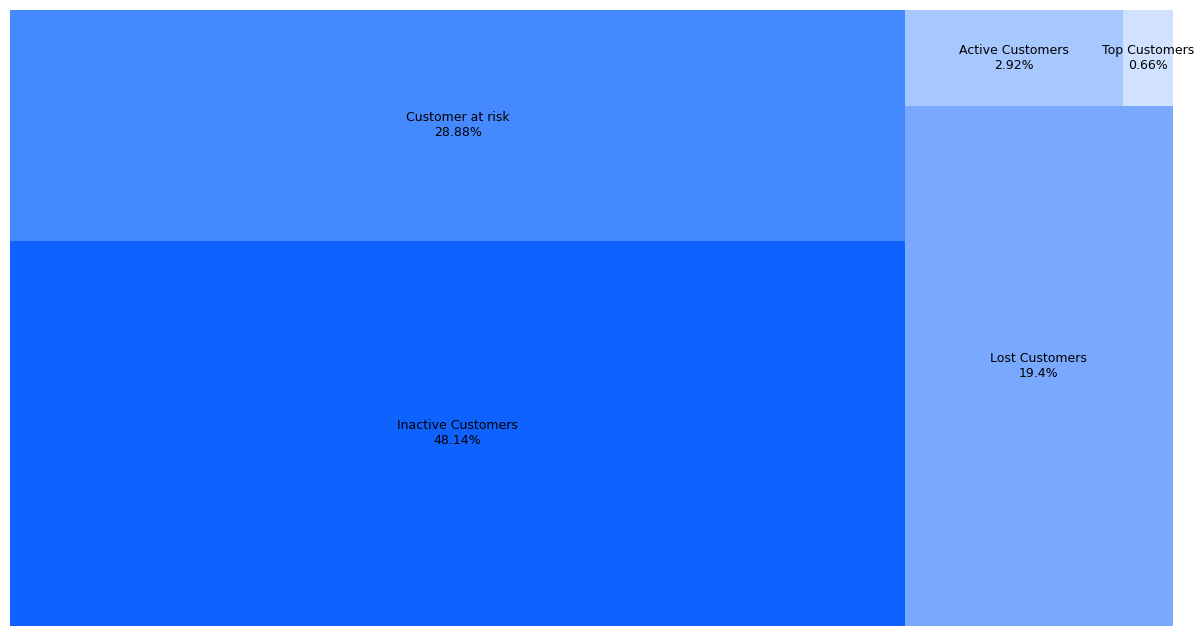

In [ ]:
plt.rcParams.update({'font.size':9})
plt.figure(figsize=(15,8))
squarify.plot(sizes=y.values,label=labels, color=["#0f62fe","#4589ff","#78a9ff","#a6c8ff","#d0e2ff"])
plt.axis('off')

# **CLV section**

In [ ]:
!pip install lifetimes -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00


In [ ]:
import lifetimes

In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [ ]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)

# **Initial data and CLV prediction**

In [ ]:
data = summary_data_from_transaction_data(df, 'customer_unique_id', 'Order_Date',  monetary_value_col='payment_value', observation_period_end='2018-10-17')
data

,frequency,recency,T,monetary_value
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,160.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,163.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,586.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,370.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,337.0,0.0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,496.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,311.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,617.0,0.0


In [ ]:
# Tần suất mua hàng và số lượng khách hàng mua hàng chỉ 1 lần
data['frequency'].plot(kind='hist', bins=40)
print(data['frequency'].describe())
print(sum(data['frequency'] == 0)/float(len(data)))

Trong tổng số khách hàng có tới 98% khách hàng chỉ mua hàng 1 lần duy nhất và không lặp lại


# **Frequency/Recency Analysis Using the BG/NBD **

In [ ]:
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 96096 subjects, a: 2.75, alpha: 42.67, b: 0.39, r: 0.01>


Ma trận frequency/recency

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

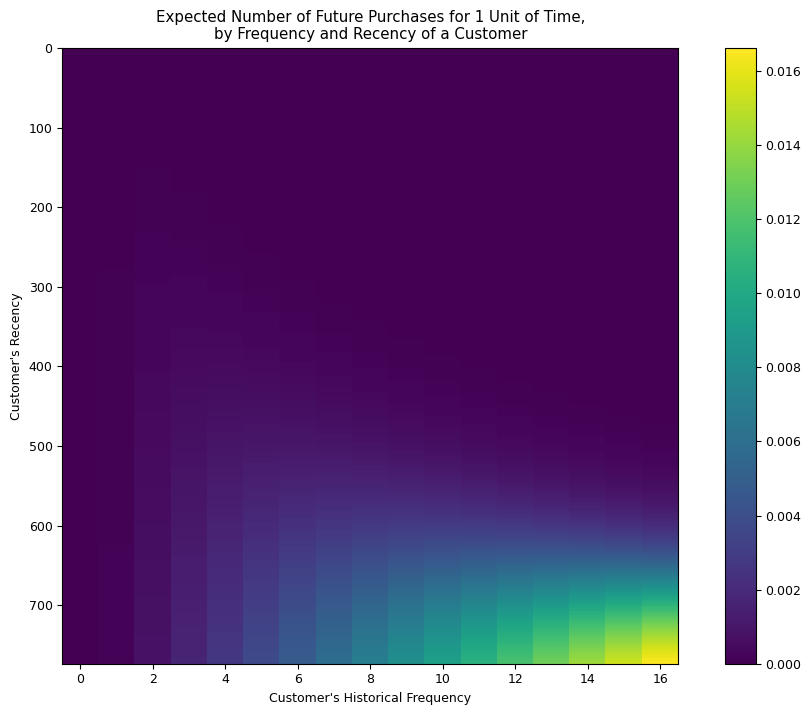

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

- Khách hàng có số lượt mua hàng bằng 16 và có recency (thời gian giữa lần mua hàng đầu tiên và thời gian mua hàng cuối cùng) là 700 là một khách hàng tốt.
- Những khách hàng có số lần mua hàng nhiều, nhưng không thường xuyên ( góc trên cùng bên phải) có thể đã rời đi.
- Nhóm khách hàng .....

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

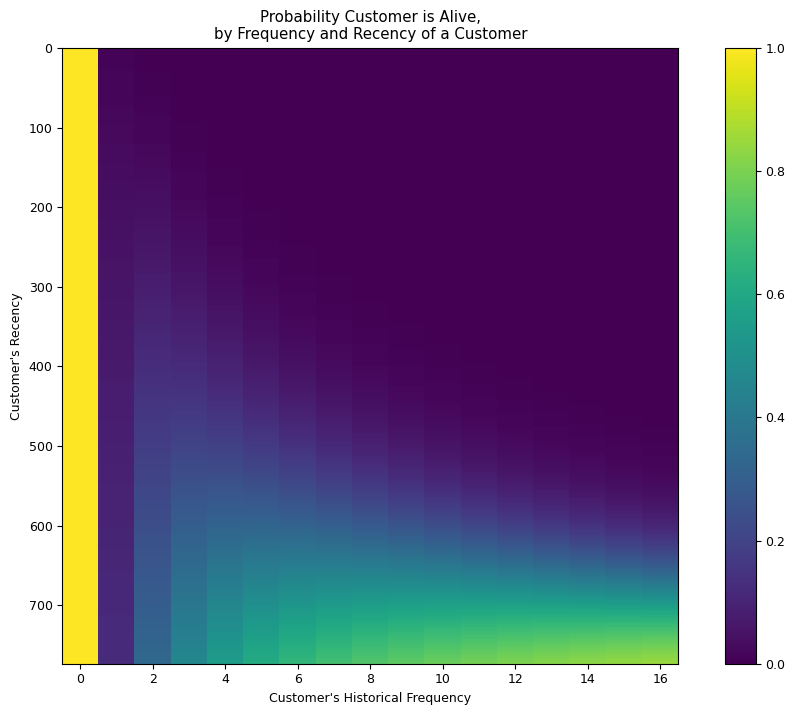

In [ ]:
#Khách hàng nào thật sự còn sống
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)


- Khách hàng mới mua gần đây gần như chắc chắn còn "sống".
- Những khách hàng đã mua nhiều nhưng không mua gần đây thì có khả năng sẽ bỏ đi. Và họ càng mua nhiều trong quá khứ thì khả năng họ bỏ cuộc càng cao. Họ được đại diện ở phía trên bên phải.

In [ ]:
#Dự đoán khả năng mua hàng trong 30 ngày tiếp theo	của top 5 khách hàng tốt nhất
exp = 30
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(exp, data['frequency'], data['recency'], data['T'])
data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
customer_unique_id,,,,,
394ac4de8f3acb14253c177f0e15bc58,4.0,236.0,299.0,149.28250,0.114503
ba84da8c159659f116329563a0a981dd,2.0,31.0,52.0,94.63000,0.119115
af5454198a97379394cacf676e1e96cb,2.0,54.0,68.0,197.55000,0.124784
dc813062e0fc23409cd255f7f53c7074,5.0,418.0,473.0,151.60600,0.130986
8d50f5eadf50201ccdcedfb9e2ac8455,16.0,462.0,520.0,56.55375,0.396677


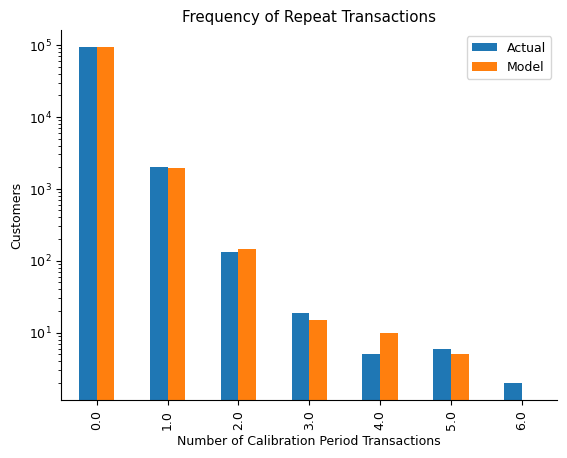

In [ ]:
from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(bgf, max_frequency=7)
ax.set_yscale('log')
sns.despine();

In [ ]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.587237
frequency,0.587237,1.000000


In [ ]:
#Shortlist customers who had at least one repeat purchase with the company.
shortlisted_customers = data[data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

                 customer_unique_id  frequency  recency      T  \
0  00172711b30d52eea8b313a7f2cced02        1.0     16.0   81.0   
1  004288347e5e88a27ded2bb23747066c        1.0    171.0  447.0   
2  004b45ec5c64187465168251cd1c9c2f        1.0    267.0  411.0   
3  0058f300f57d7b93c477a131a59b36c3        1.0     31.0  240.0   
4  00a39521eb40f7012db50455bf083460        1.0     11.0  147.0   

   monetary_value  predicted_purchases  
0          122.07             0.013378  
1          103.28             0.003477  
2           49.85             0.005694  
3           96.02             0.003562  
4           26.78             0.005573  
-----------------------------------------
The Number of Returning Customers are:  2149


In [ ]:
shortlisted_customers = shortlisted_customers[shortlisted_customers['monetary_value'] > 0]

In [ ]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2148 subjects, p: 6.10, q: 2.73, v: 43.99>


In [ ]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer.
print(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    ).head(10))

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    155.143175
0000b849f77a49e4a4ce2b2a4ca5be3f    155.143175
0000f46a3911fa3c0805444483337064    155.143175
0000f6ccb0745a6a4b88665a16c9f078    155.143175
0004aac84e0df4da2b147fca70cf8255    155.143175
0004bd2a26a76fe21f786e4fbd80607f    155.143175
00050ab1314c0e55a6ca13cf7181fecf    155.143175
00053a61a98854899e70ed204dd4bafe    155.143175
0005e1862207bf6ccc02e4228effd9a0    155.143175
0005ef4cd20d2893f0d9fbd94d3c0d97    155.143175
dtype: float64


Đa phần giá trị giống nhau vì hầu như khách hàng chỉ giao dịch một lần và không mua lại

In [ ]:
data['pred_avg_transaction_value'] = round(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']), 2)
data.reset_index()

,customer_unique_id,frequency,recency,T,monetary_value,predicted_purchases,pred_avg_transaction_value
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,160.0,0.0,0.001626,155.14
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,163.0,0.0,0.001604,155.14
2,0000f46a3911fa3c0805444483337064,0.0,0.0,586.0,0.0,0.000546,155.14
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,370.0,0.0,0.000824,155.14
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,337.0,0.0,0.000893,155.14
...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,496.0,0.0,0.000636,155.14
96092,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,311.0,0.0,0.000956,155.14
96093,ffff371b4d645b6ecea244b27531430a,0.0,0.0,617.0,0.0,0.000521,155.14
96094,ffff5962728ec6157033ef9805bacc48,0.0,0.0,168.0,0.0,0.001568,155.14


In [ ]:
unique_values = data[data['pred_avg_transaction_value'] != 155.55]['pred_avg_transaction_value'].unique()
print(unique_values)

[155.14 129.38 114.74 ... 100.51  86.27  63.13]


In [ ]:
#Calculate Customer Lifetime Value
data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    data['frequency'],
    data['recency'],
    data['T'],
    data['monetary_value'],
    time=12, # months
), 2)

data.drop(data.iloc[:, 0:6], inplace=True, axis=1)

data.sort_values(by='CLV', ascending=False).head(10).reset_index()

,customer_unique_id,CLV
0,46450c74a0d8c5ca9395da1daac6c120,563.69
1,4facc2e6fbc2bffab2fea92d2b4aa7e4,221.50
2,fe81bb32c243a86b2f86fbf053fe6140,155.36
3,8d50f5eadf50201ccdcedfb9e2ac8455,153.91
4,dc813062e0fc23409cd255f7f53c7074,138.38
5,397b44d5bb99eabf54ea9c2b41ebb905,125.13
6,394ac4de8f3acb14253c177f0e15bc58,103.43
7,c8460e4251689ba205045f3ea17884a1,102.67
8,af5454198a97379394cacf676e1e96cb,92.99
9,d132b863416f85f2abb1a988ca05dd12,81.62


In [ ]:
merged_data = pd.merge(RFMTable, data, on='customer_unique_id')
selected_columns_final=['customer_unique_id','CLV','Customer_segment']
merged_data=merged_data[selected_columns_final]
merged_data

,customer_unique_id,CLV,Customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1.84,Medium Value Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.82,Lost Customers
2,0000f46a3911fa3c0805444483337064,0.79,Low Value Customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.11,Lost Customers
4,0004aac84e0df4da2b147fca70cf8255,1.18,Medium Value Customers
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,0.90,Medium Value Customers
96092,fffea47cd6d3cc0a88bd621562a9d061,1.25,Low Value Customers
96093,ffff371b4d645b6ecea244b27531430a,0.76,Low Value Customers
96094,ffff5962728ec6157033ef9805bacc48,1.80,Low Value Customers


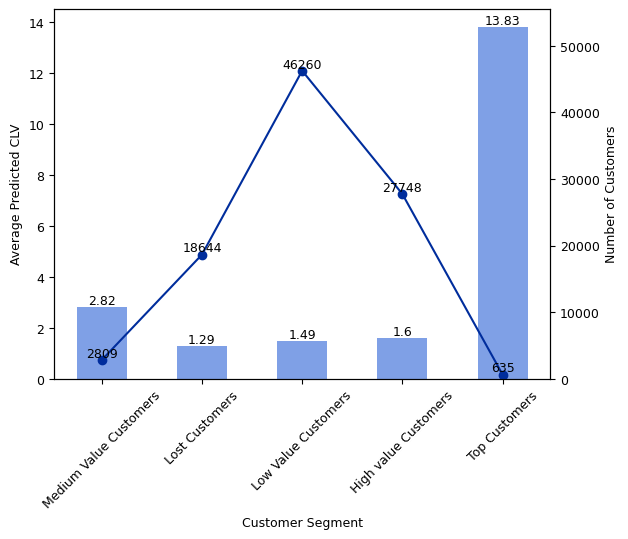

In [ ]:
# Dữ liệu cho biểu đồ
customer_segment = merged_data['Customer_segment'].unique()
average_clv = merged_data.groupby('Customer_segment')['CLV'].mean()
customer_count = merged_data.groupby('Customer_segment')['customer_unique_id'].count()

# Tạo figure và axes cho biểu đồ
fig, ax1 = plt.subplots()

# Biểu đồ cột Average predicted CLV (trục bên trái)
ax1.bar(customer_segment, average_clv, color='#0043ce', alpha=0.5, width=0.5)
ax1.set_ylabel('Average Predicted CLV', color='black')

# Tạo twin axes (trục kép) cho số lượng khách hàng (trục bên phải)
ax2 = ax1.twinx()
ax2.plot(customer_segment, customer_count, color='#002d9c', marker='o')
ax2.set_ylabel('Number of Customers', color='black')

# Đặt giới hạn cho trục y của twin axes
ax2.set_ylim(0, max(customer_count) * 1.2)

for i, v in enumerate(average_clv):
    ax1.text(i, v, str(round(v, 2)), ha='center', va='bottom', color='black')

for i, v in enumerate(customer_count):
    ax2.text(i, v, str(v), ha='center', va='bottom', color='black')

# Đặt tên cho trục x
ax1.set_xlabel('Customer Segment')
ax1.set_xticklabels(customer_segment, rotation=45)

# Hiển
plt.show()